<div style="color:#ea9c29; background-color:#3d023c; padding:10px; border-radius: 9px; font-size:24px; text-align:center;">
<h1>LIBERTADES DE IDENTIDAD EN LATINOAMÉRICA</h1>
</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px;font-size:17px;text-align: justify">
    
Se llevará a cabo un análisis sobre variables relacionadas a <b><i>Identity and Relationships</i></b> en países de Latinoamérica y se lo compararará con las estadísticas globales.

La pregunta a responder es:

<font color=#3d023c>__*¿Qué niveles de libertad se viven en Latinoamérica, específicamente en cuanto a libertades de indentidad?*__</font>

Para encaminar este análisis se plantean los siguientes interrogantes:


<ol>

<li> ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.</li>

<li> ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?</li>
    
<li> En este estudio, la libertad se mide con dos estimadores principales: <i>hf_score</i> que hace referencia a <i>Human Freedom</i>, y <i>ef_score</i> que hace referencia a <i>Economic Freedom</i>. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?</li>    

</ol>

</div>

In [1]:
# librerias
import pandas            as pd
import numpy             as np
import seaborn           as sb
#import plotly            as plo
import matplotlib.pyplot as plt
from IPython.display     import Markdown, display
import matplotlib.colors as colors
import matplotlib.cm     as cmx
import scipy             as sc

In [2]:
# lectura de dataset
dataset = pd.read_csv('hfi_cc_2018.csv')

In [3]:
# dataset con columnas relevantes para el práctico
# se crea una lista denominada: important_cols que contendrá columnas de informacion general como año, país y región,
# todas las columnas vinculadas con la libertad personal de identidad (pf_identity) y
# el puntaje asociado a la libertad en la humanidad y en aspectos económicos

important_cols  = ['year', 'ISO_code', 'countries', 'region']
important_cols += [col for col in dataset.columns if 'pf_identity' in col]
important_cols += ['ef_score', # Economic Freedom (score)
                   'ef_rank' , # Economic Freedom (rank)
                   'hf_score', # Human Freedom (score)
                   'hf_rank' ] # Human Freedom (rank)

In [4]:
string = '### **Se considerarán '+str(len(important_cols))+' columnas**'

display(Markdown(string))
display(important_cols)

### **Se considerarán 17 columnas**

['year',
 'ISO_code',
 'countries',
 'region',
 'pf_identity_legal',
 'pf_identity_parental_marriage',
 'pf_identity_parental_divorce',
 'pf_identity_parental',
 'pf_identity_sex_male',
 'pf_identity_sex_female',
 'pf_identity_sex',
 'pf_identity_divorce',
 'pf_identity',
 'ef_score',
 'ef_rank',
 'hf_score',
 'hf_rank']

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:30px;text-align: justify">
 
 <h1>1. Explorando los datos</h1>
</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:17px;text-align: justify">
    


<h3>Variables:  <i>pf_identity</i> </h3>

Permiten caracterizar la libertad que se tiene a la hora de establecer nuestra propia identidad y de tener relaciones íntimas y familiares con los demás.

<ul>
<li> <i>pf_identity_legal</i>: libertad en la identidad sexual y de género que cada individuo puede decidir en tomar. El género legal mide el grado en que las personas son libres de cambiar legalmente su sexo y género.</li>

<li> <i>pf_identity_parental</i>: mide si las mujeres tienen los mismos derechos basados en la ley y la costumbre, respecto a la tutela legal de un niño durante un matrimonio y los derechos de custodia de un niño después del divorcio. Debido a que este indicador no evalúa la naturaleza de esos derechos, sino la igualdad de derechos entre los géneros, es un proxy de un aspecto de la libertad de las mujeres en lugar de una medida directa de la libertad.</li>

<li>  <i>pf_identity_sex</i>: libertad de los individuos para establecer relaciones entre personas del mismo sexo. Se compone de dos variables de la Asociación Internacional de Lesbianas y Gays: un indicador de relación de hombre a hombre que mide la medida en que las relaciones sexuales entre hombres son legales y un indicador de mujer a mujer que mide lo mismo para las relaciones entre mujeres.</li>

<li> <i>pf_identity_divorce</i>: mide si las mujeres y los hombres tienen los mismos derechos para iniciar el divorcio</li>
</ul>



<h3> Variables: <i>ef_score</i> y <i>hf_score</i> </h3>

<ul>
<li>  <i> ef_score</i>: Los 42 indicadores que conforman el subíndice de libertad económica, constituyen el 50% del valor que recibirá el índice de libertad humana y se dividen en cinco amplias categorías. La primera categoría es el tamaño del gobierno y mide los impuestos, el gasto público y la inversión y el control del gobierno de las empresas. Un aumento en esos indicadores reduce la libertad económica porque elimina la elección individual. La segunda categoría se refiere al sistema legal y los derechos de propiedad, éste mide el nivel de protección de las personas y sus derechos de propiedad a través de indicadores de imparcialidad de los tribunales, la independencia judicial y la ejecución de contratos, entre otros. El dinero sano constituye la tercera categoría, en la medida en que el dinero de un país no es un depósito de valor confiable, socava el intercambio, obstaculiza la planificación económica, distorsiona los precios y, a través de la inflación, sirve como un impuesto. La tasa de inflación y su volatilidad se encuentran entre los indicadores medidos aquí. La cuarta categoria es la libertad de comerciar internacionalmente y mide los aranceles, las barreras comerciales no arancelarias y los controles del movimiento de capitales, entre otros indicadores. La quinta categoría se refiere a la regulación de los negocios, el trabajo y el crédito. En la medida en que el gobierno restringe la competencia en los negocios, los acuerdos voluntarios entre empleadores y empleados y la libertad de intercambio en los mercados de crédito, la libertad económica se reduce. Las áreas que se miden incluyen controles de tasa de interés, regulaciones de contratación y despido, y restricciones de licencia, entre otras.</li>

<li>  <i>hf_score</i>: mide las libertades económicas, como la libertad para comerciar o usar dinero y capta el grado en que las personas son libres de disfrutar de las libertades principales a menudo denominadas libertades civiles (libertad de expresión, religión, asociación y reunión) en el países encuestados. Además, incluye indicadores sobre el estado de derecho, el crimen y la violencia, la libertad de movimiento y la discriminación legal contra las relaciones entre personas del mismo sexo y nueve variables relacionadas con las libertades específicas de las mujeres que se encuentran en varias categorías del índice.</li>
</ul>


</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:20px;width:970px;text-align: force justify">
    
<h2>1.1 Rango de las variables</h2>

</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:17px;text-align: justify">
    
En primera instancia se creó el dataset   <span style="font-family: Monaco"> <b>mundo</b> </span>, que contiene sólo las 
columnas definidas como importantes para el presente práctico.
Posteriormente se implementaron los métodos: <i>describe()</i> junto con <i>_get_numeric_values()</i> con el fin de obtener la descripción estadística de cada columna numérica, esta contiene los valores máximos y mínimos que se utilizan para calcular el rango.

</div>

In [5]:
# se crea un nuevo dataset: mundo, con las columnas importantes para el presente analisis
mundo = dataset[important_cols]  

# se genera una tabla dada por la salida del metodo: describe
# se agrega una fila que contiene los rangos de cada variable 
describe_info              = mundo._get_numeric_data().describe()
describe_info.loc["range"] = describe_info.loc['max'] - describe_info.loc['min']

# se eliminan de la tabla anterior las columnas de rankings
columns_for_describe = [col for col in describe_info.columns if 'rank' not in col]
describe_info        = describe_info[columns_for_describe]

# output
describe_info

,year,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,hf_score
count,1458.000000,205.000000,923.000000,923.000000,1358.000000,1375.000000,1378.000000,1378.000000,585.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,6.307317,7.248104,7.632719,7.428203,6.709091,7.935414,7.325835,7.538462,7.334180,6.785610,6.993444
std,2.582875,3.635095,3.953387,3.689772,3.705913,4.683089,4.028877,4.048606,3.644142,3.159473,0.883601,1.025811
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.880000,3.765827
25%,2010.000000,7.000000,5.000000,5.000000,5.000000,0.000000,10.000000,5.000000,5.000000,5.000000,6.250000,6.336685
50%,2012.000000,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.166667,6.900000,6.923840
75%,2014.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.410000,7.894660
max,2016.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.190000,9.126313
range,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.310000,5.360486


In [6]:
# Cantidad de datos por año
mundo.groupby('year').year.count()

year
2008    162
2009    162
2010    162
2011    162
2012    162
2013    162
2014    162
2015    162
2016    162
Name: year, dtype: int64

In [88]:
# dimension de la muestra
if len(dataset[dataset.year.isna()==True])!= 0:
    print('La variable año  no sirve para determinar la dimensión de la muestras')
else:
    # dimension de la muestra
    dim = describe_info.year[0]
    #se imprime en pantalla la dimension y el porcentaje de casos con respuesta sobre una determinada variable
    display('dimensión: '+ str(int(dim))+' casos')
    print(describe_info.loc['count'][columns_for_describe[1:]]/(dim)*100)

'dimensión: 1458 casos'

pf_identity_legal                14.060357
pf_identity_parental_marriage    63.305898
pf_identity_parental_divorce     63.305898
pf_identity_parental             93.141289
pf_identity_sex_male             94.307270
pf_identity_sex_female           94.513032
pf_identity_sex                  94.513032
pf_identity_divorce              40.123457
pf_identity                      94.513032
ef_score                         94.513032
hf_score                         94.513032
Name: count, dtype: float64


<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:17px;text-align: justify">

<h3>1.1 .:Muestra</h3>

Dimensión: 1458 datos

<h3>1.1 .:Rangos</h3>
<ul><li> La muestra abarca un rango de ocho años, desde el 2008 al 2016, cada uno con una dimensión = 162 datos.</li>
<li> Los rangos de todas las variables vinculadas a la categoría <span style="font-family: Monaco"> libertad de identidad y relaciones </span> son todos iguales a 10 y con valor mínimo igual a 0.</li> 
<li> Las variables  <span style="font-family: Monaco"> libertad económica</span> y  <span style="font-family: Monaco"> libertad humana</span> tienen rangos  de 6.3 y 5.3 respectivamente, con valores mínimos cercanos a 3 (económica) y 4 (humana) y máximos cercanos a 9.</li></ul>

<h3>1.1 .:IMPACTO DE CADA VARIABLE</h3>
<p style="text-align: justify">  
Es notable que tanto la <span style="font-family: Monaco">libertad de identidad sexual con respaldo legal</span>, como también así, la <span style="font-family: Monaco">libertad de la mujer sobre la decisión del divorcio</span>, resultan ser variables con cierto grado de complejidad, dado que el porcentaje de datos no nulos sobre tales variables es de un 14% y un 40%, respectivamente. Sería interesante analizar los valores del resto de la variables de estos casos, para así intentar inferir las causas por las cuales se ha dejado el campo vacío, a modod de ejemplo, si se trata de repulsión social, disgusto, vergüenza, religión, etc.
</p>
</div>

In [8]:
# plot de todas las variables
#sb_plot = sb.pairplot(mundo)
#sb_plot.savefig("plot_global.png")

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:17px;text-align: justify">

<h1>1.2 Media, Mediana, Desviación Estándar </h1>
Dado que se nos pide dar los estadísticos sólo de las variables  <i>pf_identity</i> y <i>hf_score</i> en todo el mundo y en la región: <i>Latinoamérica y El Caribe</i>, se llevaron a cabo los siguientes pasos:
<ol>
<li> se definió una lista denominada    <span style="font-family: Monaco"> <b>variables</b> </span> que contiene solo a las variables de interés</li> 
<li> se creó el dataset <span style="font-family: Monaco"> <b>latinos</b> </span> seleccionando de la tabla mundo, los datos cuya región es la solicitada</li> 
<li> se creó una única tabla que contiene los valores de media, mediana y desviación estándar tanto de <span style="font-family: Monaco"><b>mundo</b></span> como de <span style="font-family: Monaco"><b>latinos</b></span>, dados por el método <i>describe()</i>, considerando solo la lista <span style="font-family: Monaco"> <b>variables</b></span></li> 
<li> se graficaron, sobre una recta horizontal, los valores que adoptan cada una de las variables bajo estudio con el fin de obtener una vaga idea de a qué clase pertenecen</li> 
<li> se graficaron las distribuciones de cada una de las variables</li> 
</ol>

</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">
<li>NOTA: De aquí en adelante la variable <span style="font-family: Monaco"> libertad personal de identidad y relaciones</span> será denominada simplemente: libertad personal, y la región bajo estudio como: LA&C</li> 

</div>

In [9]:
# regiones
mundo.region.unique()

array(['Eastern Europe', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Latin America & the Caribbean',
       'Caucasus & Central Asia', 'Oceania', 'Western Europe',
       'South Asia', 'North America', 'East Asia'], dtype=object)

In [10]:
variables = ['pf_identity','hf_score']
# se crea un nuevo dataset: latinos, que solo contiene datos de la region de interes: Latinoamerica y El caribe
latinos = mundo[mundo.region=='Latin America & the Caribbean']

# media, mediana y desviación estándar de las variables pf_identity y hf_score 
# a continuacion se generan dos tablas latinos_describe y mundo_describe
# que contienen la descripcion de los dataset latinos y mundo respectivamente
# considerando solo las variables bajo interes (pf_identity y hf_score)
# y los estadisticos: media, mediana y desviacion estandar

latinos_describe = latinos[variables].describe()
latinos_describe = latinos_describe.loc[['min','mean','50%','std']]
latinos_describe = latinos_describe.rename(columns={'pf_identity':'pf_identity_latinos','hf_score':'hf_score_latinos'})

mundo_describe   = mundo[variables].describe()
mundo_describe   = mundo_describe.loc[['min','mean','50%','std']]
mundo_describe   = mundo_describe.rename(columns={'pf_identity':'pf_identity_mundo','hf_score':'hf_score_mundo'})


# se genera una unica tabla: estadisticos, con los estadisticos a nivel mundial y de latinoamerica
estadisticos     = pd.merge(latinos_describe,mundo_describe,left_index=True, right_index=True)

# output de estadisticos
estadisticos

,pf_identity_latinos,hf_score_latinos,pf_identity_mundo,hf_score_mundo
min,5.000000,4.200724,0.000000,3.765827
mean,8.765086,7.047982,7.334180,6.993444
50%,10.000000,7.028045,9.166667,6.923840
std,1.711732,0.608904,3.159473,1.025811


In [11]:
0.6*100/1.71, 0.61*100/1.02

(35.08771929824562, 59.80392156862745)

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:20px;text-align: justify">

<h2>1.2 Media, Mediana y Desviación Estándar</h2>

</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:17px;text-align: justify">

<h3> 1.2 .:Media, Mediana y Desviación Estándar</h3>
<h5><i>pf_identity</i>:</h5>
<ol>
<li> Media y Mediana: se observa que tanto en la región LA&C como en el mundo, la mediana es mayor al valor de la media, dando la pauta que la variable no se distribuye normalmente. Por otro lado si se considera a cualquiera de los dos estadísticos como valor típico y se toma un criterio de disntiguibilidad de una desviación estándar (poco común pues generalmente se toman dos o tres desviaciones), se podría concluir que en LA&C la apreciación de libertad personal no difiere de la apreciación mundial.</li>
<li> Desviación Estándar: la desviación de LA&C es solo un 35% de la desviación que presenta esta variable a nivel mundial, lo cual es de esperar, ya que el aumento de la diversidad cultural conlleva a que se presenten distintas apreciaciones de libertad, siendo esta variable sensible a muchos factores sociales.</li>
</ol>

<h5><i>hf_score</i>:</h5> 
<ol>
<li> Media y Mediana: toman el mismo valor, tanto en LA&C como en el mundo, por lo tanto no se descarta que esta variable obedezca a una distribución normal, sin embargo es necesario conocer la distribución de la muestra con el fin de tener la seguridad que los valores de centralización caen sobre un único intervalo modal y así ddefinir que provienen de una distribución normal. Respecto al valor que toma este índice en LA&C frente al del mundo, se podría decir que para los valores de desviación estándar que presentan, no se dintinguen.</li>
<li> Desviación Estándar: del mismo modo que la variable <i>pf_identity</i>, la desviación éstandar de LA&C es menor que la del mundo, siendo aproximadamente %60 de esta última. </li>
</ol>

</div>

/home/meugenia/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


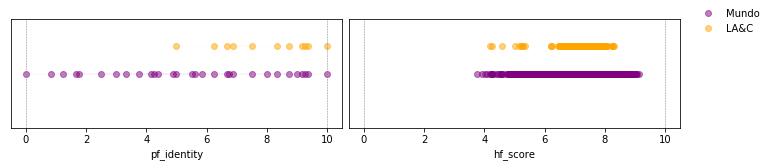

In [12]:
# valores que toma las variable pf_identity y hf_score
latinos_str = 'LA&C'

fig = plt.figure(figsize=(12,2))
ax1  = fig.add_subplot(121)
s1=plt.plot(mundo.pf_identity.unique(),np.repeat(1,len(mundo.pf_identity.unique())),ls=':',lw=0.05,marker='o',color='purple',alpha=0.5,label='Mundo')
s2=plt.plot(latinos.pf_identity.unique(),np.repeat(1.5,len(latinos.pf_identity.unique())),
            ls=':',lw=0.05,marker='o',color='orange',alpha=0.5,label=latinos_str)
plt.ylim(0,2)
plt.axvline(x=0,ls='--',color='grey',lw=0.5)
plt.axvline(x=10,ls='--',color='grey',lw=0.5)
plt.xlabel('pf_identity')
ax1.yaxis.set_major_formatter(plt.NullFormatter())
ax1.tick_params(
    axis='y',         
    which='major',      
    bottom=True,     
    top=False,
    left=False,
    right=False, 
    labelbottom=False) 


ax2  = fig.add_subplot(122)
plt.scatter(mundo.hf_score.unique(),np.repeat(1,len(mundo.hf_score.unique())),color='purple',alpha=0.5,label='Mundo')
plt.scatter(latinos.hf_score.unique(),np.repeat(1.5,len(latinos.hf_score.unique())),
            color='orange',alpha=0.5,label=latinos_str)
plt.ylim(0,2)
plt.axvline(x=0,ls='--',color='grey',lw=0.5)
plt.axvline(x=10,ls='--',color='grey',lw=0.5)
plt.xlabel('hf_score')
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax2.tick_params(
    axis='y',         
    which='major',      
    bottom=True,     
    top=False,
    left=False,
    right=False, 
    labelbottom=False)

plt.subplots_adjust(wspace=0.02)

labels = ['Mundo',latinos_str]
fig.legend([s1, s2],     
           labels=labels,  
           loc="upper right",  
           frameon=False)


<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:20px;text-align: justify">
<h3> 1.2 .: Tipo de variable:</h3>
</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:17px;text-align: justify">
A grandes rasgos se puede observar que la variable <i>pf_identity</i> es cuantitativa ordinal, mientras que <i>hf_score</i> es continua.
</div>

In [13]:
n_pf_latinos = latinos.groupby('pf_identity').pf_identity.count().sort_values()
n_pf_mundo   = mundo.groupby('pf_identity').pf_identity.count().sort_values()
moda_pf_latinos = n_pf_latinos.index[-1]
moda_pf_mundo   = n_pf_mundo.index[-1]

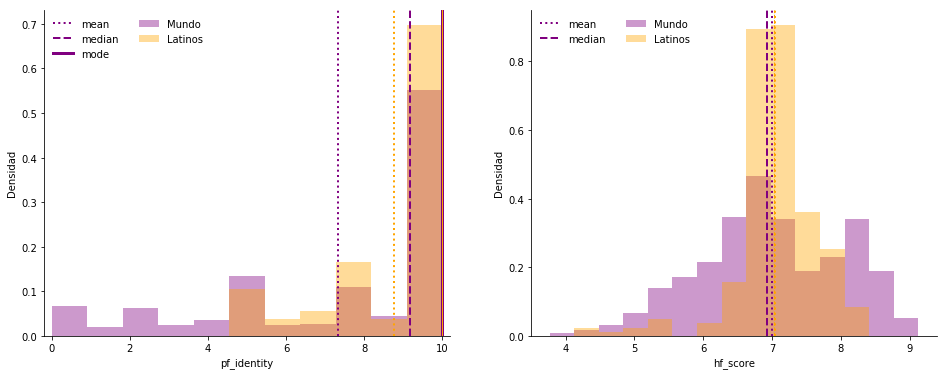

In [87]:
fig = plt.figure(figsize=(16,6))

nbin1=11
nbin2=15

ax1 = fig.add_subplot(121)
sb.distplot(mundo['pf_identity']  ,bins=nbin1 , label='Mundo',color='purple',kde=False, norm_hist=True)
sb.distplot(latinos['pf_identity'],bins=nbin1 ,
            hist_kws={'range': (mundo.pf_identity.min(), mundo.pf_identity.max())},
            label='Latinos',color='orange',kde=False,norm_hist=True)
plt.axvline(x=mundo.pf_identity.mean()    ,ls=':' ,color='purple',lw=2,label='mean')
plt.axvline(x=mundo.pf_identity.median()  ,ls='--',color='purple',lw=2,label='median')
plt.axvline(x=moda_pf_mundo               ,ls='-' ,color='purple',lw=3,label='mode')
plt.axvline(x=latinos.pf_identity.mean()  ,ls=':' ,color='orange',lw=2)
plt.axvline(x=latinos.pf_identity.median(),ls='--',color='orange',lw=1)
plt.axvline(x=moda_pf_latinos             ,ls='-' ,color='orange',lw=1)
plt.xlim(-0.2,10.2)
plt.ylabel('Densidad')
plt.legend(ncol=2,frameon=False)


ax2 = fig.add_subplot(122)
sb.distplot(mundo['hf_score'],bins=nbin2, label='Mundo',color='purple',kde=False,norm_hist=True)
sb.distplot(latinos['hf_score'],bins=nbin2 ,
            hist_kws={'range': (mundo.hf_score.min(), mundo.hf_score.max())}, 
            label='Latinos',color='orange',kde=False,norm_hist=True)
plt.axvline(x=mundo.hf_score.mean()    ,ls=':' ,color='purple',lw=2,label='mean')
plt.axvline(x=mundo.hf_score.median()  ,ls='--',color='purple',lw=2,label='median')
plt.axvline(x=latinos.hf_score.mean()  ,ls=':' ,color='orange',lw=2)
plt.axvline(x=latinos.hf_score.median(),ls='--',color='orange',lw=1)
plt.ylabel('Densidad')
plt.legend(ncol=2,loc='upper left',frameon=False)


sb.despine()

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:20px;text-align: justify">

<h2> 1.2 Modas</h2> 


</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:17px;text-align: justify">

<ul>

<li> <b><i>pf_identity</i></b>: tal como se observó anteriormente, esta variable no sigue el comportamiento de una distribución normal. Por otro lado, si bien para el caso de LA&C, la mediana fue suficiente para caracterizar el valor más representativo, coincidiendo ésta con el valor modal, lo mismo no ocurre en el mundo, pues la mediana deja de ser representativa ya que queda fuera del intervalo modal y la moda pasa a representar a la mayoría de los casos (siempre que esta mayoría tenga valor estadístico para el análisis). Respecto a si tiene sentido calcular la moda, en este caso sí, primero por la naturaleza de la variable (i.e. variable categórica) y segundo porque, si bien se pueden ver otros valores con frecuencias notables, la moda en ambos casos representa a la mayoría de los casos.</li> 


<li> <b><i>hf_score</i></b>: dada la cantidad de decimales que toma esta variable, la probabilidad de ocurrencia de un mismo valor es muy baja, de esta manera la moda no es un buen estadístico de centralización. Si se efectuara un redondeo a un decimal, entonces los valores se repetirían (se estaría en cierto modo, discretizando la variable) y la moda empezaría a tomar forma. Para estos casos por lo general se trabaja con intervalos modales y no con un valor de moda. Por otro lado, a partir de los histogramas se interpreta gráficamente la presencia de un comportamiento multimodal por lo que tampoco serviría trabajar con el intervalo modal. </li>

</ul>

</div>

In [15]:
mundo.groupby('region').agg(
    {'ISO_code':'count', 'pf_identity':'mean','pf_identity':'median', 'ef_score':'median', 'hf_score':'median'}
    ).sort_values('ef_score')

,ISO_code,pf_identity,ef_score,hf_score
region,,,,
Sub-Saharan Africa,378,5.000000,6.010,6.276072
South Asia,153,5.833333,6.625,6.585634
Middle East & North Africa,171,2.500000,6.755,6.289613
Latin America & the Caribbean,234,10.000000,6.900,7.028045
Caucasus & Central Asia,54,8.333333,6.965,6.766759
Eastern Europe,198,10.000000,7.200,7.814029
East Asia,54,10.000000,7.500,8.109151
Oceania,36,10.000000,7.590,8.033486
Western Europe,162,10.000000,7.600,8.398904


In [16]:
mundo.groupby('region').agg({'pf_identity':'median',
                             'pf_identity_parental_marriage':'median',
                             'pf_identity_divorce':'median',
                             'pf_identity_parental_divorce':'median',
                             'pf_identity_parental':'median',
                             'pf_identity_sex_male':'median',
                             'pf_identity_sex_female':'median',
                             'pf_identity_sex':'median'})

,pf_identity,pf_identity_parental_marriage,pf_identity_divorce,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex
region,,,,,,,,
Caucasus & Central Asia,8.333333,10.0,5.0,10.0,10.0,10.0,10.0,10.0
East Asia,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.0
Eastern Europe,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.0
Latin America & the Caribbean,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.0
Middle East & North Africa,2.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
North America,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.0
Oceania,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.0
South Asia,5.833333,5.0,5.0,5.0,5.0,0.0,10.0,5.0
Sub-Saharan Africa,5.000000,5.0,10.0,5.0,5.0,0.0,10.0,5.0


<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:20px;text-align: justify">

<h2> 1.3 Datos Comparables?</h2>


</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:17px;text-align: justify">
<h3> 1.3. <i>pf_identity</i>   y <i>hf_score</i>  son directamente comparables? ¿Qué otra variable podría influenciarlos?</h3>
    
<p style="text-align: justify">   
En ambos casos <b>NO</b>. Respecto a la variable <i>f_identity</i>, no se pueden comparar todos los valores a nivel mundial con los de LA&C, pues en el mundo se observan casos con valores menores a cinco que no se observan dentro de los valores de LA&C. Lo mismo sucede con la variable <i>hf_score</i>, si bien en este caso ambas clases abarcan prácticamente el mismo rango de valores, se puede ver que los cercanos a seis son poco frecuentes en LA&C mientras que en el mundo están cerca del valor de centralización de un comportamiento normal.
</p>  

<p style="text-align: justify">   
Es esperable que la libertad económica sea un factor de gran influencia. Si se observa la primera tabla (arriba), que contiene los valores de las medianas de <i>pf_identity</i>, <i>ef_score</i> y <i>hf_score</i> para cada región, se puede ver que el crecimiento del índice de libertad humana acompaña al crecimiento del índice de libertad económica, por lo que las diferencias podrían deberse a diferencias de índole económicas. Por otro lado, la segunda tabla de arriba muestra las medianas de todos lo atributos que coonsituyen a la variable <i>pf_identity</i>, de esta tabla resulta evidente que las distintas cuestiones sociales, culturales, legales, etc., afectan a tales atributos y que por lo tanto adquieren un fuerte impacto en la caracterización de este índice, siendo entonces carente de argumentos la comparación. A modo de ejemplo, comparar LA&C son África y sur/centro de Asia sería banal, pues es esperable la diferencia dados los distintos contextos.
<p>
</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:17px;text-align: justify">

<h3>1.3. .: Visualización de Diferencias e Influencias entre las variables</h3>  

<p style="text-align: justify">  
Con el fin de visualizar la diversidad de valores que estas variables toman y la influencia que tienen <i>pf_identity</i> y <i>ef_score</i> sobre <i>hf_score</i>, se realiza una tabla similar a la anterior pero para todos los países. Luego se grafica un <i>scatter-plot</i> y las frecuencias asociadas a cada eje, el color de cada punto caracteriza la región a la que pertenece el país y el tamaño, el de <i>pf_identity</i> del mismo.   
</p>

</div>

In [17]:
# medianas de los indicadores por paises
#paises  = mundo.groupby('countries').agg(
#    {'ISO_code':'count', 'pf_identity':'median', 'ef_score':'median', 'hf_score':'median'}
#    ).reset_index()

paises  = mundo.groupby('countries').agg(
    {'ISO_code':'count', 'pf_identity':'mean', 'ef_score':'mean', 'hf_score':'mean'}
    ).reset_index()

regiones  = mundo.groupby('region').agg({'ef_score':'sum'}).reset_index()

In [18]:
regiones_sub = regiones.region.values

In [19]:
# se crea un diccionario para asociar a cada pais su correspondiente region
dic1   = mundo[['countries','region']]
dic1   = dict(zip(dic1.countries.values, dic1.region.values))
dic2   = dict(zip(regiones.region.values, regiones.ef_score.values))


paises['region']  = paises['countries'].map(dic1)
paises['suma_ef'] = paises['region'].map(dic2)

n_paises                   = paises.groupby('region').region.count()
dic3                       = dict(zip(n_paises.index.values, n_paises.values))
paises['npaisxregion']     = paises['region'].map(dic3)
paises['suma_efdivpaises'] = paises.suma_ef/paises.npaisxregion

paises = paises.sort_values('region',ascending=True).reset_index()

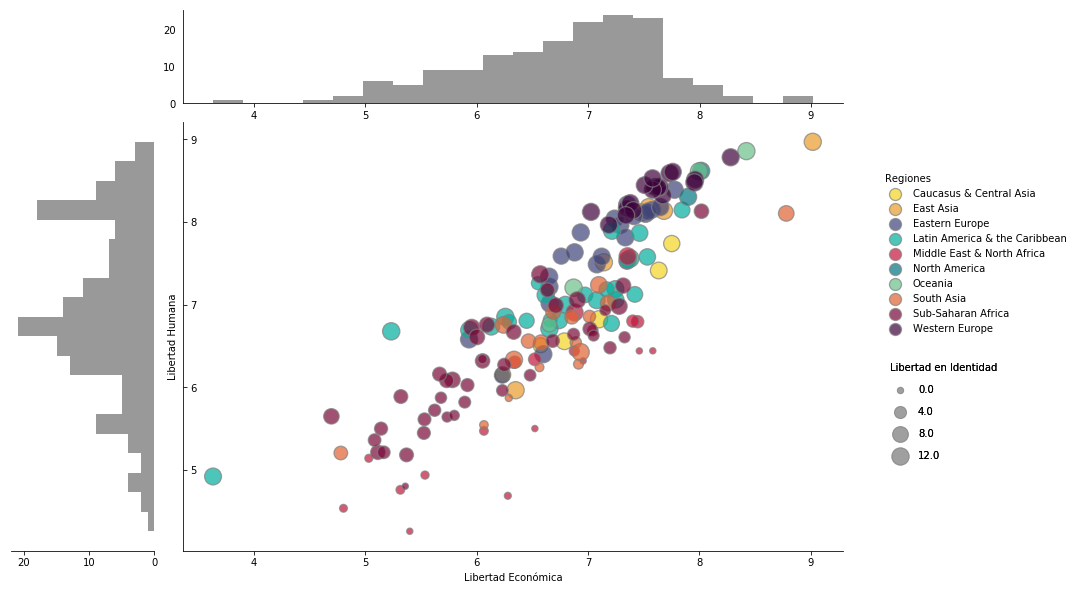

In [20]:
col1  ='#f4d524'
col2  ='#ea9c29'
col3  ='#3f437a'
col4  ='#00af9e'
col5  ='#c4153b'
col6  ='#007582'
col7  ='#6ac18a'
col8  ='#e06231'
col9  ='#790737'
col10 ='#3d023c'

colors =[col1,col2,col3,col4,col5,col6,col7,col8,col9,col10]
sb.set_palette(colors)

alpha = 0.7
lw    = 1.3

fig = plt.figure(figsize=(18,12))

ax0 = plt.subplot2grid((6,6), (0,1), colspan=4)
plt.hist(paises.ef_score, bins=20,color='gray',alpha=0.8)
for side in ['right','top']:
    ax0.spines[side].set_visible(False)    
ax0.yaxis.set_ticks_position('none')
ax0.spines['bottom'].set_position(('axes', 0))


ax1 = plt.subplot2grid((6,6), (1,1), colspan=4, rowspan=4)
sc = sb.scatterplot( x='ef_score', y='hf_score', data=paises, size=paises.pf_identity, sizes=(40, 300),
                 hue='region',palette= sb.color_palette(),alpha=alpha,edgecolor='gray',linewidth=lw)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
h,l = sc.get_legend_handles_labels()
una = sc.legend(h[1:11],l[1:11], bbox_to_anchor=(1.05, 0.9), loc=0,title='Regiones',
                frameon=False,markerscale=2)
dos = sc.legend(h[12:] ,l[12:] , borderaxespad=0,bbox_to_anchor=(1.24, 0.2),
                loc=4,title='Libertad en Identidad',frameon=False,
                labelspacing=1.2)
una._legend_box.align='left'
[una.legendHandles[i].set_alpha(alpha) for i in range(10)]
[una.legendHandles[i].set_edgecolor('gray') for i in range(10)]
[una.legendHandles[i].set_linewidth(lw) for i in range(10)]
dos._legend_box.align='left'
[dos.legendHandles[i].set_color('gray') for i in range(4)]
[dos.legendHandles[i].set_alpha(0.5) for i in range(4)]
plt.gca().add_artist(una)
plt.gca().add_artist(dos)
ax1.set_ylabel('Libertad Humana',labelpad=5)
ax1.set_xlabel('Libertad Económica',labelpad=5)
sb.despine(ax=ax1,left=True)
plt.yticks([])


ax3   = plt.subplot2grid((6,6), (1,0), rowspan=4)
plt.hist(paises.hf_score,orientation='horizontal',bins=20, color='gray',alpha=0.8)
ax3.invert_xaxis()
for side in ['left','top']:
    ax3.spines[side].set_visible(False)
#plt.yticks([])
#ax3.xaxis.set_ticks_position('none') 
#ax3.yaxis.set_ticks_position('none')
ax3.yaxis.tick_right()
ax3.spines['right'].set_position(('axes', 1.2))




<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:17px;text-align: justify">

<h3>1.3 .:Observaciones sobre el gráfico de países</h3>  
<p style="text-align: justify">
<ol>
<li> diversidad - los países de regiones asiáticas y africanas muestran valores de <i>ef_score</i> menores a siete, mientras que los países más desarrollados (regiones europeas, oceanía y américa del norte) presentan valores superiores a este número. En el medio de estos grupos se encuentran los países de LA&C.
<li> diversidad - la gran mayoría de países con valores de <i>ef_score</i> menores a siete, están caracaterizados por valores  bajos de <i>pf_identity</i>.
<li> diversidad - los países de una misma región adoptan distintos valores de <i>pf_score</i>, hasta incluso llegan a abarcar un amplio rango como es el caso de las regiones africanas.
<li> influencia - se observa una correlación positiva de dispersión moderada entre <i>hf_score</i> y <i>ef_score</i>
<li> influencia - se observa que a medida que <i>ef_score</i> crece también lo hace <i>pf_identity</i>
<li> influencia - se observa que a medida que <i>hf_score</i> crece también lo hace <i>pf_identity</i>
</ol>
</p>
<p style="text-align: justify">
Las observaciones realizadas sobre le gráfico nos conducen a concluir que la libertad económica es una variable a tener en cuenta cuando se analiza la relación entre <i>pf_identity</i> y <i>hf_score</i>.
</p>
</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:20px;text-align: justify">
    
<h2>1.4 Valores nulos de la muestra</h2>

</div>

In [21]:
len(mundo[mundo.ef_score.isna()==True])*100/dim,len(mundo[mundo.hf_score.isna()==True])*100/dim,len(mundo[mundo.ef_score.isna()==True])*100/dim

(5.486968449931413, 5.486968449931413, 5.486968449931413)

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:17px;text-align: justify">

<p style="text-align: justify">
El <i>dataset</i> conformado por las variables <i>pf_identity</i>, <i>hf_score</i> y <i>ef_score</i>, presenta aproximadamente un 5% de filas con datos nulos. Dado que el porcentaje es bajo, los casos nulos pueden eliminarse. De no eliminarlos, se pueden  sanear utilizando alguna de las siguientes formas:
<ol>    
<li> utilizando la relación observada en el gráfico anterior, entre <i>ef_score</i> y <i>hf_score</i>, se pueden completar los valores de <i>hf_score</i> faltantes mediante una interpolación. Además, si se prueba la existencia de una correlación entre <i>pf_identity</i> con <i>hf_score</i>, se pueden también sanear los de <i>pf_identity</i> llevando a cabo una asignación según algún criterio para elegir el valor de <i>pf_identity</i>, dada su naturaleza discreta.</li>
<li> utilizando la media, la moda o la mediana, del país o de la región, aunque sabiendo que estos valores de centralización no representan a la distribución en general, no sería del todo correcto si el porcentaje de valores faltantes fuera mayor.</li>
</ol>

Para el análisis de este trabajo, se eliminan los datos nulos. 
</p>
</div>

In [22]:
mundo_sin_nulos                         = mundo[mundo.pf_identity.isna()==False] 
mundo_sin_nulos['pf_identity_category'] = mundo_sin_nulos.pf_identity.astype(int)
latinos_sin_nulos                       = mundo_sin_nulos[mundo_sin_nulos.region=='Latin America & the Caribbean']

/home/meugenia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:20px;text-align: justify">

<h2>1.5 Outliers</h2>


</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:17px;text-align: justify">

<h4>        .: Aplicación de <i>Boxplots</i> para la detección de <i>outliers</i>:</h4>
<ul>
<li><b><i>pf_identity</i></b>: el gráfico que muestra la distribución de esta variable en LA&C y el mundo, evidencia la existencia de una gran cantidad de valores lejanos al valor modal. Con el fin de determinar si son <i>outliers</i>, se confeccionó un diagrama de caja para el mundo y la región LA&C. En ambos casos se obtuvo que todos los valores quedan contenidos por los límites de valores típicos de tales diagramas. Por otro lado se puede ver que la mediana del mundo es distiguible a la mediana de LA&C ya que caen fuera del intervalo de confianza de la otra variable.</li>
<li><b><i>hf_score</i></b>: del gráfico que presenta las distribuciones de esta variable, se observa que la distribución asociada a todo el mundo sigue un comportamiento multimodal que cae suavemente hacia los extremos, mientras que para LA&C existe un pequeño conjunto de datos que queda completamente exluído de la distribución bimodal que contiene a la mayoría de los valores. Se confirma que este grupo se comporta como <i>outliers</i> cuando se lleva a cabo el diagrama de cajas y, por otro lado, se observa que la distribución de todo el mundo sí presenta outliers aunque se encuentran muy cerca de los valores contenidos por dicho diagrama. También se puede ver que las medianas son distinguibles aunque están muy cerca del intervalo de confianza.</li>

</ul>

</div>

In [23]:
pf             = mundo_sin_nulos[['pf_identity_category','pf_identity']]
pf['variable'] = 'pf'
pf['valor']    = pf.pf_identity

hf             = mundo_sin_nulos[['pf_identity_category','hf_score']]
hf['variable'] = 'hf'
hf['valor']    = hf.hf_score

/home/meugenia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/meugenia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/meugenia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [24]:
comparacion = pd.concat([pf[['pf_identity_category','variable', 'valor']],hf[['pf_identity_category','variable', 'valor']]])

In [25]:
mundo_sin_nulos['clase']   ='mundo'
latinos_sin_nulos['clase'] ='latinos'

/home/meugenia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/meugenia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
base_para_boxplot = pd.concat([mundo_sin_nulos,latinos_sin_nulos])

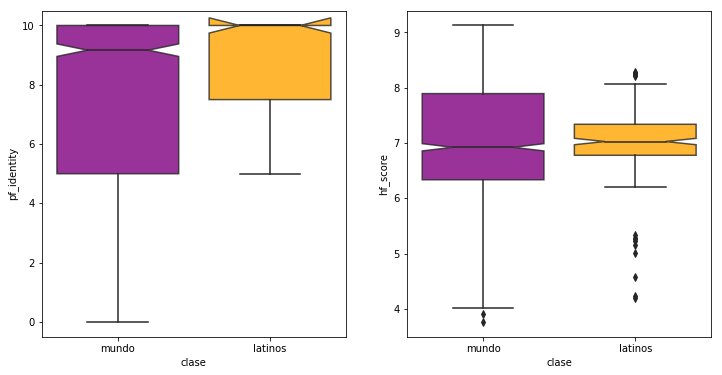

In [27]:
fig = plt.figure(figsize=(12,6))
colors2 = ['purple','orange']
sb.set_palette(colors2)

ax1=fig.add_subplot(121)
sb.boxplot(data=base_para_boxplot, y='pf_identity',x='clase',boxprops=dict(alpha=.8),saturation=2,notch=True)
ax2=fig.add_subplot(122)
sb.boxplot(data=base_para_boxplot, y='hf_score',x='clase',boxprops=dict(alpha=.8),saturation=2,notch=True)

In [28]:
q1l  = np.percentile(latinos_sin_nulos.hf_score,25)
q3l  = np.percentile(latinos_sin_nulos.hf_score,75)
RIQl = q3l-q1l

bigote_inferiorl = q1l-1.5*RIQl 
bigote_superiorl = q3l+1.5*RIQl

display('% de outliers por debajo del límite inferior: '+str(round(len(latinos_sin_nulos[latinos_sin_nulos.hf_score<bigote_inferiorl])*100/len(latinos_sin_nulos),2)))
display('% de outliers por encima del límite superior: '+str(round(len(latinos_sin_nulos[latinos_sin_nulos.hf_score>bigote_superiorl])*100/len(latinos_sin_nulos),2)))

'% de outliers por debajo del límite inferior: 3.88'

'% de outliers por encima del límite superior: 2.16'

In [29]:
q1m  = np.percentile(mundo_sin_nulos.hf_score,25)
q3m  = np.percentile(mundo_sin_nulos.hf_score,75)
RIQm = q3m-q1m

bigote_inferiorm = q1m-1.5*RIQm 
bigote_superiorm = q3m+1.5*RIQm

display('% de outliers por debajo del límite inferior: '+str(round(len(mundo_sin_nulos[mundo_sin_nulos.hf_score<bigote_inferiorm])*100/len(mundo_sin_nulos),2)))
display('% de outliers por encima del límite superior: '+str(round(len(mundo_sin_nulos[mundo_sin_nulos.hf_score>bigote_superiorm])*100/len(mundo_sin_nulos),2)))

'% de outliers por debajo del límite inferior: 0.15'

'% de outliers por encima del límite superior: 0.0'

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:17px;text-align: justify">

<h3>  1.5 .:Outliers</h3>
<h4>      .: Eliminación:</h4>

Porcentaje de <i>outliers</i>: 6% de los casos.

<b>Por qué en principio se tendería a eliminar los <i>outliers</i> de la variable <i>hf_score</i>?</b>  

Si el fin es analizar la tendencia a nivel regional:
<ol>
<li> mundo: el rango de valores típicos es grande, es decir, la variable presenta una gran dispersión, por lo tanto, dado que los valores atípicos son pocos (0.15% de los casos) y cercanos al límite del rango abarcado por el <i>boxplot</i>, el hecho de eliminarlos no generaría cambios apreciables en la distribución observada.</li>
<li> LA&C: dado que la dispersión es baja y que la mayoría de los <i>outliers</i> cae suficientemente alejados de los límites del <i>boxplot</i>, siendo que esta mayoría solo representa un 4% de los casos, no sería grave eliminarlos. Si el porcentaje fuera mayor, llevar a cabo esta acción provocaría un desplazamiento del estadístico de centralización y sesgaría los resultados, pues quizá la información de tales outliers podría ser relevante.</li>  
</ol>


<b>Por qué NO eliminarlos?</b> 

Si el fin es estudiar el comportamiento de países que no siguen el comportamiento global de la región, entonces deberían permanecer en el estudio.   

</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:17px;text-align: justify">

<h3>  1.5 .:Outliers</h3>
<h4>        .: Análisis por categorías de <i>pf_identity</i></h4>
Para analizar los casos atípicos en el cruce de las variables <i>hf_score</i> y <i>pf_identity</i>, se crearon once categorías de la variable <i>pf_identity</i>, por redondeo al mínimo entero de cada valor. A cada categoría se le asoció un <i>boxplot</i> que contiene la correpondiente distribución de valores de <i>hf_score</i>.

Análisis de tales categorías:
<ol>
<li> mundo: se observa que existen cinco de once categorías, con datos atípicos, siendo la categoría <i>pf_identity = 7</i> la que se destaca en cantidad y en sesgo hacia valores más chicos, ya que llegan a alejarse en más de dos unidades de la mediana, lo cual podría afectar a futuras correlaciones.</li>
<li> LA&C:  se observa que la mitad de las categorías presenta <i>outliers</i> y que la mayoría están asociados a la clase <i>pf_identity=10</i>, alcanzando hasta dos unidades menos del valor de la mediana. Esto nos dice que esta variable tiene poco peso en la confección del <i>hf_score</i>, ya que por más que la <i>pf_identity</i> tenga el valor máximo, <i>hf_score</i> puede llegar a valer mitad.</li> 
</ol>

Como comentario, nuevamente se destaca la concentración o baja dispersión de los datos de LA&C respecto a la del mundo, lo cual podría deberse a que los datos de la base mundial presentan una población culturalmente más heterogénea, frente a la de una única región, como ye se ha mencionado.

<h4>        .: Observaciones generales del gráfico</h4>
Se puede observar, ahora con más claridad que en el <i>scatter-plot</i>, que existe una relación entre <i>hf_score</i> y <i>pf_identity</i>, pues a medida que esta última crece también lo hace el <i>hf_score</i>. Si, por ejemplo, se quisiera modelar la relación existente entre estas dos variables haciendo uso de la mediana, sería conveniente eliminar los valores atípicos. Por el contrario, si ae utilizara la media, probablemente al ajuste quedaría sesgado hacia donde se encuentren los <i>outliers</i>.


</div>

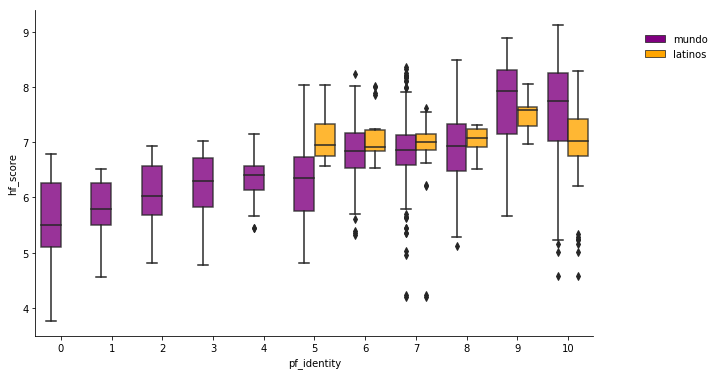

In [30]:
plt.figure(figsize=(10,6))

colors2 = ['purple','orange']
sb.set_palette(colors2)

sb.boxplot(data=base_para_boxplot, x='pf_identity_category', y='hf_score',
           hue='clase',palette= sb.color_palette(),boxprops=dict(alpha=.8),saturation=2)
plt.ylabel('hf_score')
plt.xlabel('pf_identity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2, frameon=False)
sb.despine()

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:30px;text-align: justify">

<h2> 2. Agregación de datos </h2>


</div>

In [31]:
evolucion_anual_mundo = base_para_boxplot[base_para_boxplot.clase=='mundo'].groupby('year').agg(
    {'pf_identity':'mean','hf_score':'mean','ef_score':'mean'})

evolucion_anual_latinos = base_para_boxplot[base_para_boxplot.clase=='latinos'].groupby('year').agg(
    {'pf_identity':'mean','hf_score':'mean','ef_score':'mean'})

evolucion_anual_latinos['clase'] = 'latinos'
evolucion_anual_mundo['clase'] = 'mundo'



evolucion_anual_mundo_std = base_para_boxplot[base_para_boxplot.clase=='mundo'].groupby('year').agg(
    {'pf_identity':'std','hf_score':'std','ef_score':'std'})

evolucion_anual_latinos_std = base_para_boxplot[base_para_boxplot.clase=='latinos'].groupby('year').agg(
    {'pf_identity':'std','hf_score':'std','ef_score':'std'})

evolucion_anual_latinos_std['clase'] = 'latinos'
evolucion_anual_mundo_std['clase'] = 'mundo'

base_para_plot = pd.concat([evolucion_anual_mundo,evolucion_anual_latinos])

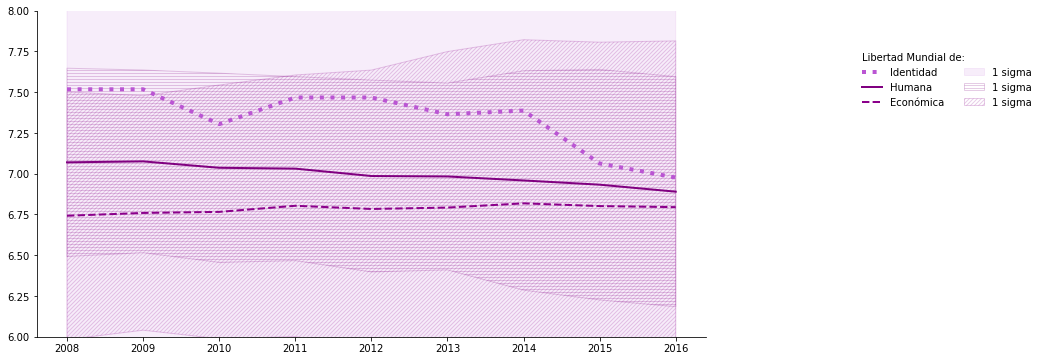

In [32]:
plt.figure(figsize=(12,6))
def plot_years(x,y,std,ls,col):
    plt.plot(x,y,ls=ls,color=col)
    #plt.fill_between(x,y-std,y+std,alpha=0.2,color=col)

    
#sb.lineplot(x='year',y='pf_identity',data=mundo_sin_nulos,color='red'  )    
#sb.lineplot(x='year',y='ef_score'   ,data=mundo_sin_nulos,color='green')  
#sb.lineplot(x='year',y='hf_score'   ,data=mundo_sin_nulos,color='blue' )  

#plt.legend()
plt.plot(evolucion_anual_mundo.index,
           evolucion_anual_mundo.pf_identity,
           ls=':',lw=4, color='mediumorchid',label='Identidad')


plt.plot(evolucion_anual_mundo.index,
           evolucion_anual_mundo.hf_score,
           ls='-',lw=2, color='purple',label='Humana')

plt.plot(evolucion_anual_mundo.index,
           evolucion_anual_mundo.ef_score,
           ls='--',lw=2, color='darkmagenta',label='Económica')


plt.fill_between(evolucion_anual_mundo.index,
           evolucion_anual_mundo.pf_identity-evolucion_anual_latinos_std.pf_identity,
           evolucion_anual_mundo.pf_identity+evolucion_anual_latinos_std.pf_identity,      
           color='mediumorchid',label='1 sigma',alpha=.1,facecolor='None')

plt.fill_between(evolucion_anual_mundo.index,
           evolucion_anual_mundo.hf_score-evolucion_anual_latinos_std.hf_score,
           evolucion_anual_mundo.hf_score+evolucion_anual_latinos_std.hf_score,      
           facecolor='None',label='1 sigma',alpha=.2,hatch='----',edgecolor='purple')

plt.fill_between(evolucion_anual_mundo.index,
           evolucion_anual_mundo.ef_score-evolucion_anual_latinos_std.ef_score,
           evolucion_anual_mundo.ef_score+evolucion_anual_latinos_std.ef_score,
           label='1 sigma',
           facecolor='None',alpha=.2,hatch='//////',edgecolor='darkmagenta')      
           
l = plt.legend(title='Libertad Mundial de:',ncol=2,bbox_to_anchor=(1.50, 0.9),frameon = False,)

l._legend_box.align='left'

plt.ylim(6,8)

sb.despine()

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:17px;text-align: justify">

<h3> 2.1 Tendencia mundial de <i>pf_identity</i>,  <i>ef_score</i> y <i>hf_score</i> </h3>    
A nivel global se observa que los valores de libertad personal y de libertad humana, tienden a la baja durante
el transcurso de los años, mientras la libertad económica crece. Para discernir si este comportamiento caracteriza a todas las regiones, en la figura que sigue se muestra el mismo gráfico pero separado por regiones.
Como comentario al margen, se observa que en el año 2014 hubo un importante acontecimiento a nivel mundial que tuvo su repercusión sobre muchos países dada la fuerte caída que se presenta en la tendencia de <i>pf_identity</i>. 


Buscando acontecimientos importantes de dicho año, se encuentran:

1. __29 de junio__ - IRAK/SIRIA - Los yihadistas del Estado Islámico (EI) proclaman un "califato" en los territorios bajo su control en Irak, donde conquistaron un 40% del territorio tras una __ofensiva fulgurante__, y en Siria.

2. __18 de febrero__ - UCRANIA - Las fuerzas del orden lanzan un asalto contra los manifestantes proeuropeos, que ocupan la plaza de la Independencia (Maidan) de Kiev desde hace tres meses. Los enfrentamientos dejan __más de 100 muertos en tres días__.

3. __8 de marzo__ - MALASIA - Un Boeing 777 de Malaysia Airlines que efectuaba un vuelo entre Kuala Lumpur y Pekín __desapareció con 239 personas a bordo__. A pesar de las intensas búsquedas, no se encontró ningún resto del aparato.

4. __16 de marzo__ - UCRANIA/RUSIA - Crimea, una región autónoma rusohablante del sur de Ucrania, aprueba por referéndum su integración en Rusia. Esta "anexión", denunciada por Kiev y los países occidentales, provoca __la peor crisis diplomática con Moscú desde la caída de la URSS__. En abril, una insurrección separatista prorrusa comienza en el este de Ucrania. Kiev intenta desde entonces retomar el control de las regiones separatistas, donde __han muerto hasta ahora (06/12/2014) más de 4.600 personas (según la ONU)__. El 9 de diciembre comenzó una nueva tregua pero las conversaciones de paz todavía no han arrancado.

5. 14 de abril - NIGERIA - Los islamistas nigerianos de Boko Haram secuestran a 276 alumnas adolescentes de su escuela en Chibok (noreste), algunas de las cuales consiguen huir. El rapto suscita una indignación internacional sin precedentes. Un total de __219 chicas continúan desaparecidas__.

6. __8 de julio__ - ISRAEL/PALESTINOS - Israel lanza la operación "Barrera Protectora" en la Franja de Gaza para detener el lanzamiento de cohetes por parte del Hamas palestino. La operación, que dura 50 días, deja casi __2.200 palestinos muertos, en su mayoría civiles, y más de 70 del lado israelí__.

7. __17 de julio__ - MALASIA/UCRANIA - __Un misil derriba un Boeing 777 de Malaysia Airlines, con 298 personas a bordo__, cuando sobrevolaba una zona controlada por los separatistas prorrusos en el este de Ucrania. Kiev y los rebeldes se acusan mutuamente de derribar esta aeronave, que iba de Ámsterdam a Kuala Lumpur.

8. __8 de agosto__ - ÉBOLA - La Organización Mundial de la Salud (OMS) decreta una movilización internacional contra la epidemia de fiebre hemorrágica del Ébola. Hasta el 15 de diciembre __la epidemia ha matado a más de 6.800 personas__, principalmente, en Liberia, Sierra Leona y Guinea, según la OMS.

</div>

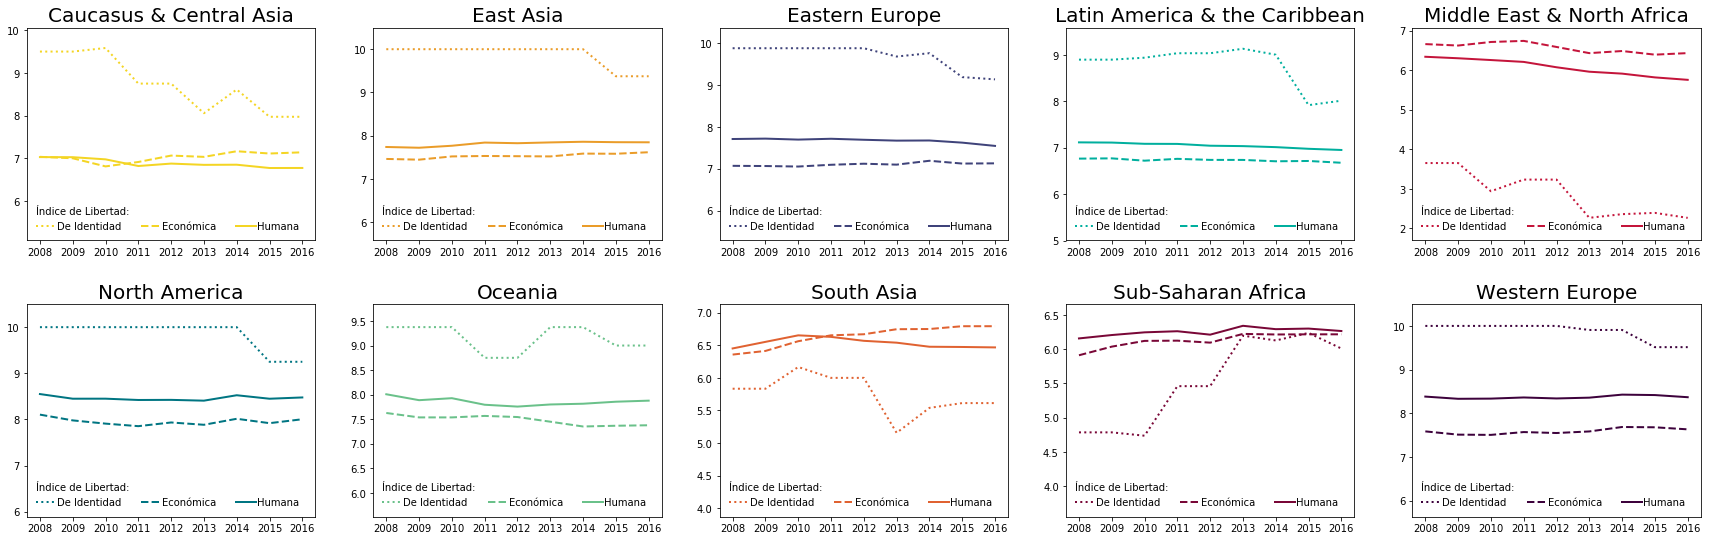

In [33]:
j=0
fig = plt.figure(figsize=(30,9))
for i in regiones_sub:
    j+=1
    region_ = mundo_sin_nulos[mundo_sin_nulos.region==i].groupby('year').agg({'pf_identity':'mean','hf_score':'mean',
                                                                             'ef_score':'mean'})
    hf_min = region_.hf_score.min()
    ef_min = region_.ef_score.min()
    pf_min = region_.pf_identity.min()
    hf_max = region_.hf_score.max()
    ef_max = region_.ef_score.max()
    pf_max = region_.pf_identity.max()
    
    min_ = np.min([hf_min,ef_min,pf_min])
    max_ = np.max([hf_max,ef_max,pf_max])
    
    ax = fig.add_subplot(2,5,j)
    plt.plot(region_.index,region_.pf_identity,color=colors[j-1],ls=':',lw=2,label='De Identidad')
    plt.plot(region_.index,region_.ef_score,color=colors[j-1],ls='--',lw=2,label='Económica')
    plt.plot(region_.index,region_.hf_score,color=colors[j-1],ls='-',lw=2,label='Humana')
    plt.ylim(min_ - 0.25*min_,max_+0.05*max_)
    plt.title(i, fontsize=20)
    l = plt.legend(title   = 'Índice de Libertad:',
                   ncol    = 3,
                   loc     = 'lower left',
                   frameon = False,
                   handletextpad=0.1)
    l._legend_box.align='left'

fig.subplots_adjust(hspace=0.3)       
fig.subplots_adjust(wspace=0.2) 

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:17px;text-align: justify">

### 2.1 Tendencia regional de *pf_identity*,  *ef_score* y *hf_score*   

La figura (arriba) muestra que existe una gran diversidad de comportamientos cuando se realiza el análisis separando al mundo en diferentes regiones:

1. existen regiones donde la libertad personal toma valores altos (*East Asia*, *Eastern Europe*, *Latin America*, *North America*, y *Western Europe*) y se mantienen prácticamente constantes entre los años: 2008 y 2013. Además, se puede apreciar un comportamiento que se repite en todas las regiones (a excepción de *South Asia*), la caída abrupta de la valoración de la libertad personal en el año 2014, tal como se observaba a nivel mundial. La región de *Sub-Sahara Africa* es la única que presenta un marcado crecimiento entre el 2010 y 2015, pasando de tomar valores promedios cercanos a 4.75 a valores apenas superiores a 6, mientras LA&C presenta un crecimiento menos intenso pero no deja de estar fuera del comportamiento de caída hasta el año 2014.

2. en todos los casos, se observa que el valor medio de libertad económica fluctúa muy poco año tras año, para una misma región. Este comportamiento también se observa a nivel mundial. No obstante no todas las regiones siguen una tendencia a la baja, como así lo establece dicha tendencia.

3. en *Middle East y North Africa*, *Sub-Sahara Africa* y *South Asia*, ocurre que los valores promedios de libertad económica están por encima de los de libertad personal, además, asumen los valores más bajos respecto al resto del mundo. Esto puede entenderse puesto en contexto con las grandes dificultades que afectan a estas regiones del mundo donde aún hoy existen gobiernos dictatoriales, guerras y conflictos armados, represión contra la población civil y activistas, discriminación y marginación de mujeres y colectivos LGTBI+, entre otros.  

En términos generales, se puede realizar un análisis más riguroso si se separa el mundo en distintas regiones. Esto permite comparar las valoraciones año a año con los distintos movimientos culturales o hechos históricos que tienen lugar en cada región particular.
    
</div>

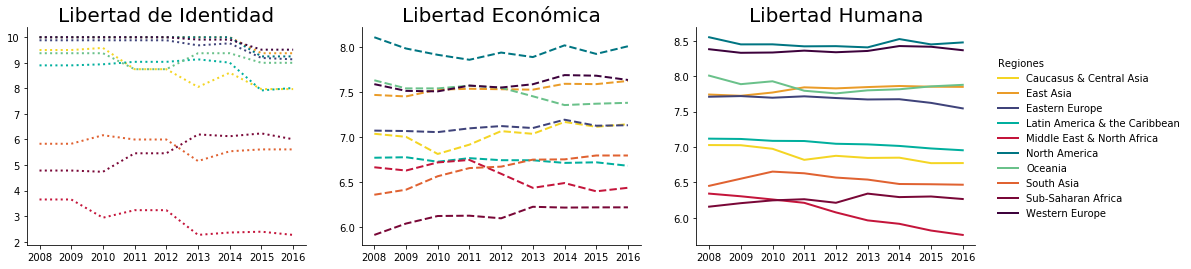

In [34]:
fig = plt.figure(figsize=(17,4))

ax1 = fig.add_subplot(131)
j=0
for i in regiones_sub:
    region_ = mundo_sin_nulos[mundo_sin_nulos.region==i].groupby('year').agg({'pf_identity':'mean','hf_score':'mean',
                                                                             'ef_score':'mean'})
    plt.plot(region_.index,region_.pf_identity,color=colors[j],ls=':',lw=2)
    j+=1
plt.title('Libertad de Identidad',fontsize=20)

j=0    
ax2 = fig.add_subplot(132)
for i in regiones_sub:
    region_ = mundo_sin_nulos[mundo_sin_nulos.region==i].groupby('year').agg({'pf_identity':'mean','hf_score':'mean',
                                                                             'ef_score':'mean'})
    plt.plot(region_.index,region_.ef_score,color=colors[j],ls='--',lw=2)
    j+=1
plt.title('Libertad Económica',fontsize=20)
    
j=0
ax2 = fig.add_subplot(133)
for i in regiones_sub:
    region_ = mundo_sin_nulos[mundo_sin_nulos.region==i].groupby('year').agg({'pf_identity':'mean','hf_score':'mean',
                                                                             'ef_score':'mean'})
    plt.plot(region_.index,region_.hf_score,color=colors[j],ls='-',lw=2,label=i)
    j+=1
plt.title('Libertad Humana',fontsize=20)    

l = plt.legend(frameon = False,bbox_to_anchor=(1.05, 0.9),title='Regiones')
l._legend_box.align='left'
    
sb.despine()

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

### 2.1 .:Tendencia regional de *pf_identity*,  *ef_score* y *hf_score*  

- el gráfico (arriba) muestra la variedad de comportamientos de las variables durante en el transcurso de los años. Se puede ver que *Western Europe* Y *North America* presentan altos valores en las tres variables. Le siguen *Western Europe*, *East Asia* y *Oceania*. Es notable una *gap* en los valores de *pf_identity*, que separa a las regiones de *South* y África en general, del mundo. Estas regiones se rankean mal en todas las variables.
- respecto a LA&C, como se ha mencionado anteriormente, presenta un comportamiento atípico en la libertad personal hasta el año 2014, no obstante se encuentra entre los valores más altos de esta variable. Esto no sucede con la libertad económica y dado que la libertad humana adopta valores muy cercanos a la anterior, pareciera que la determinación de *hf_score* está fuertemente influenciado por las cuestiones económicas de esta región
</div>

In [35]:
paises_lamyc = mundo_sin_nulos[mundo_sin_nulos.region==regiones_sub[3]].countries.unique()

In [36]:
paisesLatinos = pd.DataFrame(columns=['year','pf_identity','hf_score','ef_score'])

for i in paises_lamyc:
    paisLAMC = mundo_sin_nulos[mundo_sin_nulos.countries==i].groupby('year').agg({'pf_identity':'mean','hf_score':'mean','ef_score':'mean'}).reset_index()
    paisLAMC['categoria_ef'] = ''
    paisLAMC['categoria_pf'] = ''    
    paisLAMC.loc[(paisLAMC.ef_score>=7),'categoria_ef'] = 'mayor a 7'
    paisLAMC.loc[(paisLAMC.ef_score<7)&(paisLAMC.ef_score>=5),'categoria_ef'] = 'entre 5 y 7'
    paisLAMC.loc[(paisLAMC.ef_score<5),'categoria_ef'] = 'menor a 5'
    
    #paisLAMC.loc[(paisLAMC.pf_identity>=8),'categoria_pf'] = 'mayor a 8'
    #paisLAMC.loc[(paisLAMC.pf_identity<8)&(paisLAMC.pf_identity>=7),'categoria_pf'] = 'entre 7 y 8'
    #paisLAMC.loc[(paisLAMC.pf_identity<7),'categoria_pf'] = 'menor a 7'
    
    #paisLAMC.loc[(paisLAMC.pf_identity>=7)&(paisLAMC.year<2014),'categoria_pf'] = 'mayor o igual a 7'
    #paisLAMC.loc[(paisLAMC.pf_identity<8)&(paisLAMC.pf_identity>=7),'categoria_pf'] = 'entre 7 y 8'
    #paisLAMC.loc[(paisLAMC.pf_identity<7)&(paisLAMC.year<2014),'categoria_pf'] = 'menor a 7'
 
    paisLAMC['country']=i
    paisesLatinos = pd.concat([paisesLatinos,paisLAMC])

In [37]:
#paises_lamyc 

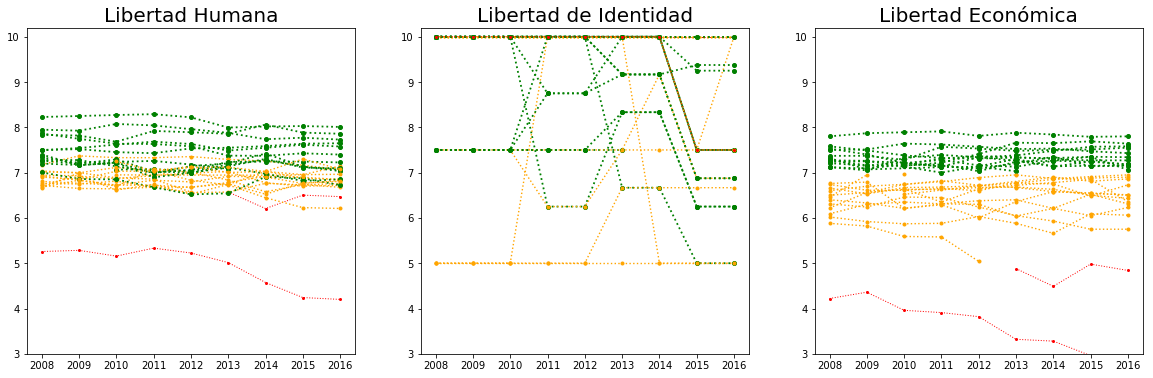

In [38]:
fig = plt.figure(figsize=(20,6))
titulos = ['Libertad Humana','Libertad de Identidad','Libertad Económica']
for j in range(3):
    j=j+1
    ax = fig.add_subplot(1,3,j)
    for i in paises_lamyc:
        region_ = paisesLatinos[(paisesLatinos.country==i)&(paisesLatinos.categoria_ef=='mayor a 7')].groupby('year').agg({'pf_identity':'mean','hf_score':'mean',                                                                             'ef_score':'mean'})
        y=[region_.hf_score, region_.pf_identity,region_.ef_score]  
        plt.plot(region_.index,y[j-1],color='green',ls=':',lw=1.8,marker='o',ms=4)

        region_ = paisesLatinos[(paisesLatinos.country==i)&(paisesLatinos.categoria_ef=='entre 5 y 7')].groupby('year').agg({'pf_identity':'mean','hf_score':'mean',                                                                             'ef_score':'mean'})
        y=[region_.hf_score, region_.pf_identity,region_.ef_score]   
        plt.plot(region_.index,y[j-1],color='orange',ls=':',lw=1.4,marker='o',ms=3)

        region_ = paisesLatinos[(paisesLatinos.country==i)&(paisesLatinos.categoria_ef=='menor a 5')].groupby('year').agg({'pf_identity':'mean','hf_score':'mean',                                                                            'ef_score':'mean'})
        y=[region_.hf_score, region_.pf_identity,region_.ef_score]   
        plt.plot(region_.index,y[j-1],color='red',ls=':',lw=1,marker='o',ms=2)
    plt.title(titulos[j-1],fontsize=20)
    plt.ylim(3,10.2)


<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

### 2.2 .: Explorando el comportamiento de las variables en LA&C:  

Con  el fin de interpretar la influencia de *ef_score* sobre el comportamiento de las variable en LA&C, se generaron tres clases: 
1. verde: clase 1, *ef_score* mayor a siete
2. anaranjado: clase 2, *ef_score* entre 5 y 7
3. rojo: clase 3, *ef_score* menor a 5


Cada país de la región fue sometido a dicha clasificación para intentar comprender el comportamiento atípico que la región posee en la libertad personal.
Si bien esta clasificación no permite encontrar las causas, sí permite ver, a grandes rasgos, que existe un único país dentro de la clase 3 con *pf_identity* mayoritariamente igual a 10, que toma el mínimo valor de *hf_score* para todos los años (cercano a 5), esto acompaña a la observación anterior entre la fuerte dependencia de *hf_score* con *ef_score*. Por otro laado se aprecia la distinción de dos grupos de países con libertados económicas diferentes, los de clase 1 y los de clase 2.

A modo de comprender el comportamiento de la libertad personal, se separan los países que para años menores
al 2011 presentaron valores de esta variable *pf_identity* menores a 8, a los cuales se 
los denominará __especiales__, siendo el resto de los países, no especiales

</div>

In [39]:
#paisesLatinos[paisesLatinos.pf_identity<7].country.unique()

In [40]:
dic_sur_caribe = {'Argentina':'america del sur',
    'Bahamas':'caribe',
    'Barbados':'caribe',
    'Belize':'caribe',
    'Bolivia':'america del sur', 
    'Brazil':'america del sur',
    'Chile':'america del sur',
    'Colombia':'caribe',
    'Costa Rica':'caribe',
    'Dominican Rep.':'caribe',
    'Ecuador':'america del sur',
    'El Salvador':'caribe', 
    'Guatemala':'caribe', 
    'Guyana':'caribe',
    'Haiti':'caribe',
    'Honduras':'caribe',
    'Jamaica':'caribe',
    'Mexico':'caribe',
    'Nicaragua':'caribe',
    'Panama':'caribe',
    'Paraguay':'america del sur',
    'Peru':'america del sur',
    'Suriname':'caribe',
    'Trinidad and Tobago':'caribe',
    'Uruguay':'america del sur',
    'Venezuela':'america del sur'}

In [41]:
paisesLatinos['subregion'] = paisesLatinos['country'].map(dic_sur_caribe)

In [42]:
especiales = paisesLatinos[(paisesLatinos.pf_identity<8)&(paisesLatinos.year<2011)].country.unique()
noespeciales = paisesLatinos[(paisesLatinos.pf_identity>=8)&(paisesLatinos.year<2011)].country.unique()

In [43]:
especiales

array(['Barbados', 'Belize', 'Guyana', 'Haiti', 'Honduras', 'Jamaica',
       'Peru', 'Trinidad and Tobago'], dtype=object)

In [44]:
paisesLatinos['especiales'] = ''
paisesLatinos.loc[paisesLatinos.country.isin(especiales)==True,'especiales'] = 'si'
paisesLatinos.loc[paisesLatinos.country.isin(especiales)==False,'especiales']= 'no'

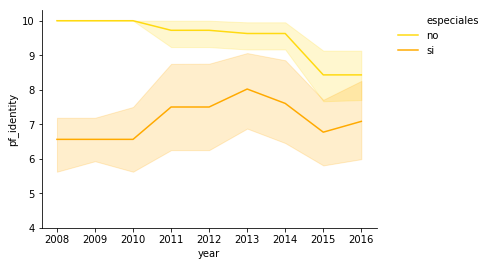

In [45]:
palette = sb.color_palette('Wistia', 2)
sb.lineplot(data=paisesLatinos, x='year', y='pf_identity', hue='especiales', palette=palette)
plt.ylim(4,10.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1,frameon=False)
sb.despine()

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

### 2.3 .: Explorando el comportamiento de las variables en LA&C: 

Dentro de los países especiales de la nueva clasificación se encuentran: *Barbados, Belize, Guyana, Haiti, Honduras, Jamaica, Peru, Trinidad and Tobago*. En general o son países de recursos muy precarios y/o se encuentran en lugares geográficos de grandes catástrofes naturales.

En el gráfico de arriba se puede ver que los países especiales han ido incrementando su libertad personal hasta el año 2013, lo cual podría estar vinculado a ese comportamiento atípico respecto a la tendencia global, de esta variable. Este comportamiento puede estar asociado a los diferentes movimientos que se promueven a nivel mundial, como la ideología de género y el movimiento feminista, que en los últimos años cobró fuerza en los países en subdesarrollo. Por otro lado, el avance de nuevas tecnologías y comunicaciones permite una mayor conectividad a nivel mundial que también podría tratarse de un factor determinante. O incluso, la respuesta del resto de los países ante las situaciones extremas que viven.
  
</div>

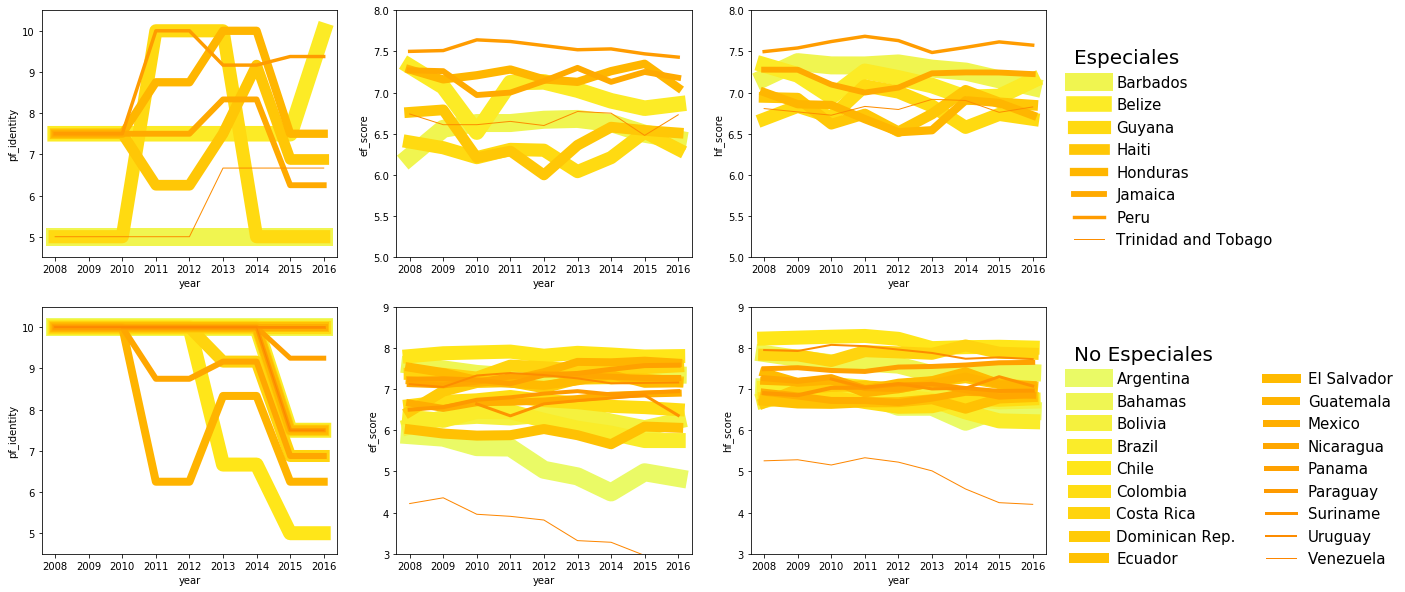

In [46]:
fig = plt.figure(figsize=(18,10))


#especiales
palette = sb.color_palette('Wistia', len(especiales))
ax  = fig.add_subplot(231)
sb.lineplot(data=paisesLatinos[paisesLatinos.country.isin(especiales)],
            x='year', y='pf_identity', hue='country', size='country', sizes=(1,len(noespeciales)),palette=palette)
ax.legend('',bbox_to_anchor=(1.05, 1),frameon = False)
plt.ylim(4.5,10.5)

ax  = fig.add_subplot(232)
sb.lineplot(data=paisesLatinos[paisesLatinos.country.isin(especiales)],
            x='year', y='ef_score', hue='country', size='country', sizes=(1,len(noespeciales)),palette=palette)
plt.ylim(5,8)
plt.legend('',bbox_to_anchor=(1.05, 1),frameon = False)

ax  = fig.add_subplot(233)
sc = sb.lineplot(data=paisesLatinos[paisesLatinos.country.isin(especiales)],
            x='year', y='hf_score', hue='country', size='country', sizes=(1,len(noespeciales)),palette=palette)
plt.ylim(5,8)
h,l = sc.get_legend_handles_labels()
una = sc.legend(h[1:],l[1:], bbox_to_anchor=(1.05, 0.9), loc=0,title='Especiales',
                frameon=False,markerscale=2,ncol=1,fontsize=15)
una._legend_box.align='left'
una.set_title('Especiales',prop={'size':20})


#-------------------------------------------------------------------------------------------------------------------

#no especiales
palette = sb.color_palette('Wistia', len(noespeciales))
ax  = fig.add_subplot(234)
sb.lineplot(data=paisesLatinos[paisesLatinos.country.isin(noespeciales)],
            x='year', y='pf_identity', hue='country', size='country', sizes=(1,len(noespeciales)),palette=palette)
ax.legend('',bbox_to_anchor=(1.05, 1),frameon = False)
plt.ylim(4.5,10.5)

ax  = fig.add_subplot(235)
sb.lineplot(data=paisesLatinos[paisesLatinos.country.isin(noespeciales)],
            x='year', y='ef_score', hue='country', size='country', sizes=(1,len(noespeciales)),palette=palette)
plt.ylim(3,9)
plt.legend('',bbox_to_anchor=(1.05, 1),frameon = False)

ax  = fig.add_subplot(236)
sc = sb.lineplot(data=paisesLatinos[paisesLatinos.country.isin(noespeciales)],
            x='year', y='hf_score', hue='country', size='country', sizes=(1,len(noespeciales)),palette=palette)
plt.ylim(3,9)
h,l = sc.get_legend_handles_labels()
una = sc.legend(h[1:],l[1:], bbox_to_anchor=(1.05, 0.9), loc=0,title='No Especiales',
                frameon=False,markerscale=2,ncol=2,fontsize=15)
una._legend_box.align='left'
una.set_title('No Especiales',prop={'size':20})

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">
    
Entre los países no especiales, se puede ver que el país que se destacaba en el gráfico de las clases, es Venezuela. Este comportamiento es esperable frente a la crisis política, económica y social que sufre el país desde 2012.
</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:30px;text-align: justify">

## 3. Distribuciones

</div>

In [47]:
latinosbis = latinos.copy()
latinosbis['especiales'] = ''
latinosbis.loc[latinosbis.countries.isin(especiales)==True,'especiales'] = 'si'
latinosbis.loc[latinosbis.countries.isin(especiales)==False,'especiales'] = 'no'

/home/meugenia/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/meugenia/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


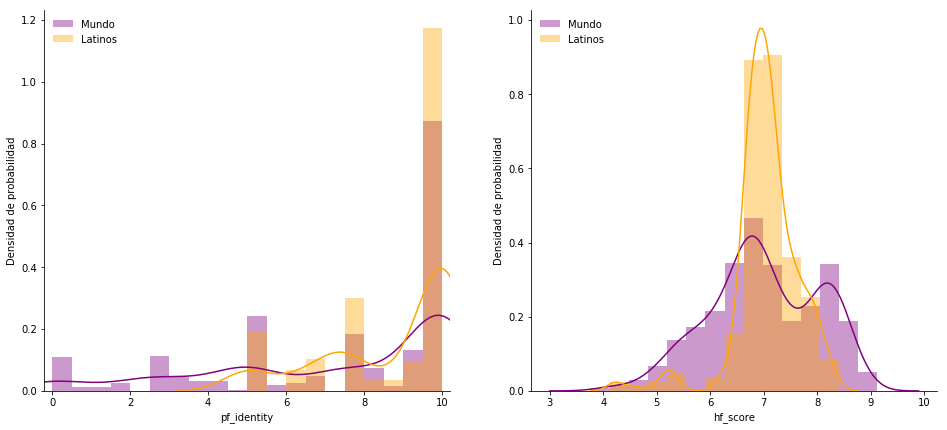

In [48]:
fig = plt.figure(figsize=(16,7))

nbin1=20
nbin2=15

ax1 = fig.add_subplot(121)
sb.distplot(mundo['pf_identity']  ,bins=nbin1 , label='Mundo',color='purple')
sb.distplot(latinos['pf_identity'],bins=nbin1 ,hist_kws={'range': (mundo.pf_identity.min(),
            mundo.pf_identity.max())}, label='Latinos',color='orange')
plt.xlim(-0.2,10.2)
plt.ylabel('Densidad de probabilidad')
plt.legend(frameon=False)


ax2 = fig.add_subplot(122)
sb.distplot(mundo['hf_score'],bins=nbin2, label='Mundo',color='purple')
sb.distplot(latinos['hf_score'],bins=nbin2 ,hist_kws={'range': (mundo.hf_score.min(), mundo.hf_score.max())}, 
            label='Latinos',color='orange')
plt.ylabel('Densidad de probabilidad')
plt.legend(loc='upper left',frameon=False)

sb.despine()

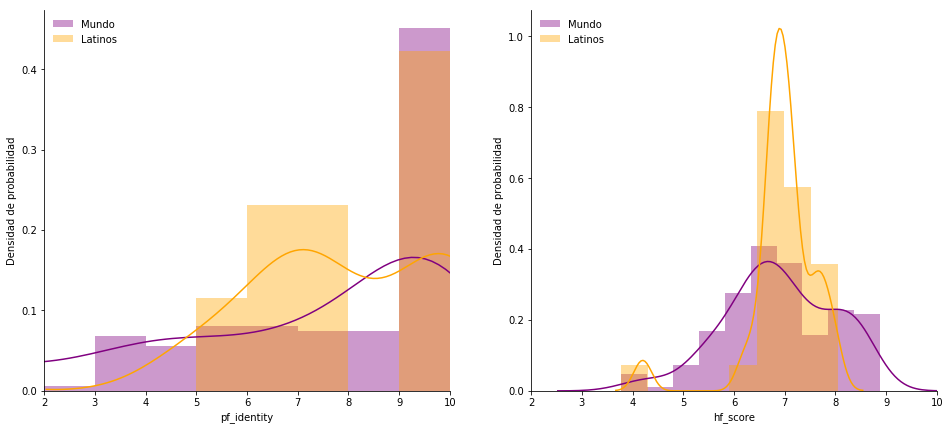

In [122]:
fig = plt.figure(figsize=(16,7))

nbin1=10
nbin2=10


sel_año = 2016

ax1 = fig.add_subplot(121)
sb.distplot(mundo[mundo.year==sel_año]['pf_identity'] ,bins=nbin1 , label='Mundo',color='purple')
sb.distplot(latinos[latinos.year==sel_año]['pf_identity'],bins=nbin1 ,hist_kws={'range': (mundo.pf_identity.min(),
            mundo.pf_identity.max())}, label='Latinos',color='orange')
plt.xlim(-0.2,10.2)
plt.ylabel('Densidad de probabilidad')
plt.legend(frameon=False)
plt.xlim(2,10)

ax2 = fig.add_subplot(122)
sb.distplot(mundo[mundo.year==sel_año]['hf_score'],bins=nbin2, label='Mundo',color='purple')
sb.distplot(latinos[latinos.year==sel_año]['hf_score'],bins=nbin2 ,hist_kws={'range': (mundo.hf_score.min(), mundo.hf_score.max())}, 
            label='Latinos',color='orange')
plt.ylabel('Densidad de probabilidad')
plt.legend(loc='upper left',frameon=False)
plt.xlim(2,10)

sb.despine()

plt.savefig('distro_'+str(sel_año)+'.png')

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">
    
###  3.1 Graficar en un mismo histograma la distribución de la variable *pf_identity* en global  y LA&C.
¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?

En ninguno de los casos se observan distribuciones conocidas, sino más bien una fusión de varias, no sería adecuado establecer que alguna distribución ajusta de manera global a los datos de cada variable. Por ejemplo, para el caso de *pf_identity* gráficamente se puede observar una distribución bimodal caracerizada por una gaussiana centrada en 7 y
otra en 8, con similares dispersiones y muy solapadas. Para *hf_score* se observa un comportamiento trimodal, con una gaussiana de amplia dispersión centrada entorno a 6 y otras dos de menor dispersión, menos solapadas, centradas en valores cercanos a 7 y 9. A modo de prueba, se podrían separar los datos y ver si es posible ajustarles distribuciones conocidas.


</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

## 3.2  Realizar una prueba de Kolmogorov-Smirnof
Con el fin de comprobar que no se ajustan globalmente a una distribución establecida visualmente, se aplica el test de *Kolmogorov-Smirnof*, el cual se basa en asumir como hipótesis nula, que las distribuciones que compara son iguales bajo considerando el p-valor calculado en comparación de un grado de significancia. Así, a *pf_identity* se la compara con una distribución de poisson, dado su comportamiento discreto, mientras a *hf_identity* se la compara con una gaussiana.
</div>



<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

### 3.2 .: *pf_identity* :  K-S test con Poisson

Se compara la distribución de esta variable, en el mundo y en LA&C, con 1500 distribuciones de Poisson y se pide mostrar el resultado del test siempre que el p-valor supere un grado de significancia del 5%

</div>

In [49]:
from scipy import stats

In [50]:
for i in range(1500):
    mu  = i*0.01
    x   = mundo_sin_nulos.pf_identity 
    st = stats.kstest(x,'poisson',args=(mu,))
    if st[1]>0.0001:
        print('p-value distinto de cero con mu:',round(mu,2), ' k-test:', round(st[0],2), ' p_value:', round(st[1],2))
    #if i%500==0:
    #    print(st)         

In [51]:
for i in range(1500):
    mu  = i*0.01
    x   = latinos_sin_nulos.pf_identity 
    st = stats.kstest(x,'poisson',args=(mu,))
    if st[1]>0.0001:
        print('p-value distinto de cero con mu:',round(mu,2), ' k-test:', round(st[0],2), ' p_value:', round(st[1],2))
    #if i%500==0:
    #    print(st)

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

### 3.2 .: *pf_identity* : Resultado del K-S test  con Poisson
    
Ninguno de los intentos, tanto en el mundo como en LA&C, ha entregado un p-value mayor a un 5% de significancia,
es más, se ha comprobado que ninguna llega a valores de p = 0.001, por lo tanto no se puede decir que se suficiente evidencia para descartar que las distribución de *pf_identity* (mundo y LA&C) proviene de una distribución de Poisson 

</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

### 3.2 .: *pf_identity* :  K-S test con Normal sobre todos los años:

Para este caso, se estandarizan los datos con el fin de que la comparación sea correcta.
</div>

In [155]:
z = (latinos_sin_nulos.pf_identity-latinos_sin_nulos.pf_identity.mean())/latinos_sin_nulos.pf_identity.std() 
stats.kstest(z,'norm')

KstestResult(statistic=0.35088781204626546, pvalue=4.8166522633069314e-26)

In [124]:
z = (mundo_sin_nulos.pf_identity-mundo_sin_nulos.pf_identity.mean())/mundo_sin_nulos.pf_identity.std() 
stats.kstest(z,'norm')

KstestResult(statistic=0.23673609609146884, pvalue=2.0004263167944867e-68)

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

### 3.2 .: *pf_identity* :  K-S test con Normal para cada año:

Para este caso, se estandarizan los datos con el fin de que la comparación sea correcta.
</div>

In [179]:
print('-----LA&C------------------------\n')
for i in range(9):
    sel_año=2008+i
    var = latinos_sin_nulos[latinos_sin_nulos.year==sel_año]
    z = (var.pf_identity-var.pf_identity.mean())/var.pf_identity.std() 
    ks = stats.kstest(z,'norm')
    print(sel_año,'  ks= ',round(ks[0],2),' p-valor= ',round(ks[1],4),'  media= ',round(var.pf_identity.mean(),4))

-----LA&C------------------------

2008   ks=  0.41  p-valor=  0.0002   media=  8.9
2009   ks=  0.41  p-valor=  0.0002   media=  8.9
2010   ks=  0.42  p-valor=  0.0001   media=  8.9423
2011   ks=  0.41  p-valor=  0.0002   media=  9.0385
2012   ks=  0.41  p-valor=  0.0002   media=  9.0385
2013   ks=  0.35  p-valor=  0.0024   media=  9.1346
2014   ks=  0.31  p-valor=  0.0088   media=  9.0064
2015   ks=  0.21  p-valor=  0.172   media=  7.9199
2016   ks=  0.21  p-valor=  0.1632   media=  8.016


In [180]:
print('-----MUNDO----------------------\n')
for i in range(9):
    sel_año=2008+i
    var = mundo_sin_nulos[mundo_sin_nulos.year==sel_año]
    z = (var.pf_identity-var.pf_identity.mean())/var.pf_identity.std() 
    ks = stats.kstest(z,'norm')
    print(sel_año,'  ks= ',round(ks[0],2),' p-valor= ',round(ks[1],5),'  media= ',round(var.pf_identity.mean(),4))

-----MUNDO----------------------

2008   ks=  0.32  p-valor=  0.0   media=  7.5177
2009   ks=  0.32  p-valor=  0.0   media=  7.5177
2010   ks=  0.31  p-valor=  0.0   media=  7.3039
2011   ks=  0.31  p-valor=  0.0   media=  7.4673
2012   ks=  0.31  p-valor=  0.0   media=  7.4673
2013   ks=  0.25  p-valor=  0.0   media=  7.3646
2014   ks=  0.26  p-valor=  0.0   media=  7.3873
2015   ks=  0.21  p-valor=  0.0   media=  7.0629
2016   ks=  0.21  p-valor=  0.0   media=  6.9763


<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

### 3.2 .: *pf_identity* : Resultado del K-S test  con Normal 
Al igual que en el intento anterior, no se puede aceptar que las distribuciones de *pf_identity* se distribuyen normalmente dado que el p-value es cero tanto a nivel mundial como regional. 
</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

### 3.2 .: *hf_score* :  K-S test con Normal sobre todos los años
</div>

In [125]:
variable = mundo_sin_nulos.hf_score
z = (variable-variable.mean())/variable.std() 
stats.kstest(z,'norm')

KstestResult(statistic=0.06597824906177652, pvalue=1.1677888753166128e-05)

In [126]:
variable = latinos_sin_nulos.hf_score
z = (variable-variable.mean())/variable.std() 
stats.kstest(z,'norm')

KstestResult(statistic=0.1504746027707088, pvalue=4.737935317381503e-05)

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

### 3.2 .: *hf_score* :  K-S test con Normal para cada año
</div>

In [181]:
print('-----LA&C------------------------\n')
for i in range(9):
    sel_año=2008+i
    var = latinos_sin_nulos[latinos_sin_nulos.year==sel_año]
    z = (var.hf_score-var.hf_score.mean())/var.hf_score.std() 
    ks = stats.kstest(z,'norm')
    print(sel_año,'  ks= ',round(ks[0],2),' p-valor= ',round(ks[1],4),'  media= ',round(var.pf_identity.mean(),4))

-----LA&C------------------------

2008   ks=  0.18  p-valor=  0.364   media=  8.9
2009   ks=  0.18  p-valor=  0.3749   media=  8.9
2010   ks=  0.17  p-valor=  0.4   media=  8.9423
2011   ks=  0.2  p-valor=  0.2422   media=  9.0385
2012   ks=  0.15  p-valor=  0.5966   media=  9.0385
2013   ks=  0.16  p-valor=  0.5152   media=  9.1346
2014   ks=  0.16  p-valor=  0.4375   media=  9.0064
2015   ks=  0.23  p-valor=  0.1051   media=  7.9199
2016   ks=  0.23  p-valor=  0.1054   media=  8.016


In [182]:
print('-----MUNDO----------------------\n')
for i in range(9):
    sel_año=2008+i
    var = mundo_sin_nulos[mundo_sin_nulos.year==sel_año]
    z = (var.hf_score-var.hf_score.mean())/var.hf_score.std() 
    ks = stats.kstest(z,'norm')
    print(sel_año,'  ks= ',round(ks[0],2),' p-valor= ',round(ks[1],5),'  media= ',round(var.pf_identity.mean(),4))

-----MUNDO----------------------

2008   ks=  0.08  p-valor=  0.33156   media=  7.5177
2009   ks=  0.08  p-valor=  0.29078   media=  7.5177
2010   ks=  0.07  p-valor=  0.35731   media=  7.3039
2011   ks=  0.08  p-valor=  0.27699   media=  7.4673
2012   ks=  0.08  p-valor=  0.31617   media=  7.4673
2013   ks=  0.07  p-valor=  0.43615   media=  7.3646
2014   ks=  0.07  p-valor=  0.35294   media=  7.3873
2015   ks=  0.06  p-valor=  0.5456   media=  7.0629
2016   ks=  0.06  p-valor=  0.58564   media=  6.9763


<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

### 3.2 .: *hf_score* :  Resultado del K-S test  con Normal:

Al igual que en el intento anterior, no se puede aceptar que las distribuciones de *hf_identity* se distribuyen normalmente dado que el p-value es cero tanto a nivel mundial como regional. 
</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

### 3.2 .: *hf_score* :  K-S test  con Normal en subconjuntos:

En lo que sigue se someten a prueba K-S tres subconjuntos de la variable *hf_score* seleccionados a partir del comportamiento trimodal observado gráficamente.
</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

- MUNDO

</div>

In [127]:
variable = mundo_sin_nulos[(mundo_sin_nulos.hf_score<6.1)].hf_score
z = (variable-variable.mean())/variable.std() 
stats.kstest(z,'norm')

KstestResult(statistic=0.09613718752106104, pvalue=0.014699143397639955)

In [128]:
variable = mundo_sin_nulos[(mundo_sin_nulos.hf_score<7.6)&(mundo_sin_nulos.hf_score>5.9)].hf_score
z = (variable-variable.mean())/variable.std() 
stats.kstest(z,'norm')

KstestResult(statistic=0.0336117504720157, pvalue=0.3633050150989826)

In [129]:
variable = mundo_sin_nulos[mundo_sin_nulos.hf_score>7.6].hf_score
z = (variable-variable.mean())/variable.std() 
stats.kstest(z,'norm')

KstestResult(statistic=0.03040412105084462, pvalue=0.8312313220653436)

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">
    
### 3.2 continuación

Se puede observar que en los casos en los que las gaussianas presentan menos dispersión, el valor de p-value crece notablemente. Esto conlleva a no rechazar la hipótesis nula, es decir, se acepta que los subgrupos escogidos se distribuyen siguiendo una distribución normal, en el primer caso, bajo una significancia de un 1%

</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

- LATINOS

</div>

In [130]:
variable = latinos_sin_nulos[(latinos_sin_nulos.hf_score>6)].hf_score
z = (variable-variable.mean())/variable.std() 
stats.kstest(z,'norm')

KstestResult(statistic=0.09652547135948158, pvalue=0.02926686747559102)

In [131]:
variable = latinos_sin_nulos[(latinos_sin_nulos.hf_score>6)&(latinos_sin_nulos.hf_score<7.6)].hf_score
z = (variable-variable.mean())/variable.std() 
stats.kstest(z,'norm')

KstestResult(statistic=0.036758868468749345, pvalue=0.9630920195849901)

In [132]:
variable = latinos_sin_nulos[(latinos_sin_nulos.hf_score>7.6)].hf_score
z = (variable-variable.mean())/variable.std() 
stats.kstest(z,'norm')

KstestResult(statistic=0.08913416450070677, pvalue=0.9304508120863757)

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

### 3.2 continuación

Al igual que en el caso mundial, al considerar subconjuntos caracterizados por las distintas modas de la distribución, se puede ver cómo el valor de p dejar de ser cero, permitiendo así aceptar que tales subgrupos siguen distribuciones normales. En todos los casos el p-valor supera un valor de significancia del 5%.
</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">
    
### 3.3 TEST Q-Q:
El test Q-Q nos permite determiar gráficamente, cuándo dos distribuciones son iguales, mediante
la comparación de sus cuantiles. Si dos distribuciones son iguales, cada par ordenado cuantil muestral vs cuantil teórico (o muestral de una variable vs muestral de la otra) yacerá sobre la recta identidad. Cuando esto no sucede, no se puede asegurar que se trata de la misma distribución.

Con el fin de aplicar el test para determiar si las variables de la muestra se distribuyen normalmente,
se aplican los siguiented pasos:

- fabricar una distribución gaussiana cuyos parámetros media y desviación estándar serán los correspondientes a la varieble en estudio
- generar una muestra aleatoria de la distribución antes fabricada
- crear un vector que contenga los percentiles que se van a considerar para el análisis
- obtener los valores de los cuantiles de cada variable (muestral y teórica en este caso) utilizando los mismos percentiles
- graficar los pares Cuantil Muestral vs Cuantil Teórico

</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

    
###  3.3 .: *hf_score*: MUNDO
 
A continuación se expone la distribución de la variable *hf_score* considerando todos sus valores (figura superior), y un subgrupo dados por los valores *hf_score*>7.6 (figura inferior). En ambos casos, se grafica una distribución teórica con los mismos parámetros de media y desviación estándar que muestran los datos.

</div>

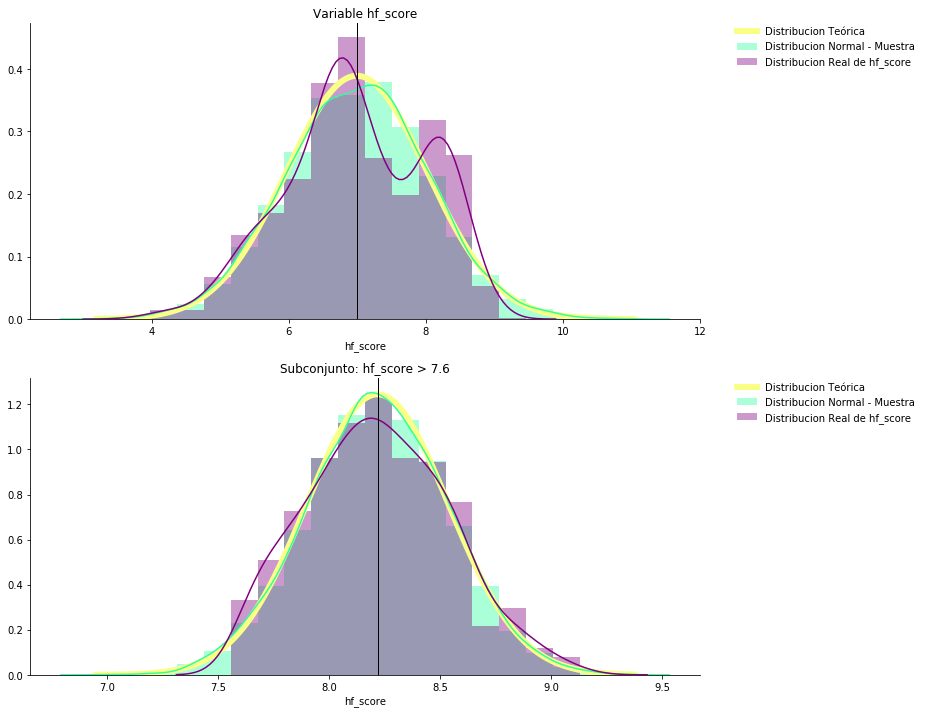

In [133]:
# se fabrica una distribucion gaussiana utilizando los estadisticos de media y sigma de hf_score
variable  = mundo_sin_nulos.hf_score
mu, sigma = stats.norm.fit(variable)
norm_dist = stats.norm(mu, sigma)
muestra   = norm_dist.rvs(10000)

# se fabrica una distribucion gaussiana utilizando los estadisticos de media y sigma de hf_score
variable2   = mundo_sin_nulos[mundo_sin_nulos.hf_score>7.6].hf_score
mu2, sigma2 = stats.norm.fit(variable2)
norm_dist2  = stats.norm(mu2, sigma2)
muestra2    = norm_dist2.rvs(10000)

fig = plt.figure(figsize=(12,12))
nbin=20

# grafico1
ax=fig.add_subplot(211)
x_plot = np.linspace(np.min(muestra), np.max(muestra), 1000)                                                                                                                  
plt.plot(x_plot, stats.norm.pdf(x_plot, mu, sigma),color='#faff86',lw=6,label='Distribucion Teórica')
sb.distplot(muestra , bins=nbin, label='Distribucion Normal - Muestra',color='#2cff9f')
sb.distplot(variable, bins=nbin, label='Distribucion Real de hf_score',color='purple',
            hist_kws={'range': (muestra.min(), muestra.max())})
plt.axvline(x=mu,ls='-' ,color='black',lw=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
plt.title('Variable hf_score')
sb.despine()

# grafico2
ax=fig.add_subplot(212)
x_plot = np.linspace(np.min(muestra2), np.max(muestra2), 1000)                                                                                                                  
plt.plot(x_plot, stats.norm.pdf(x_plot, mu2, sigma2),color='#faff86',lw=6,label='Distribucion Teórica')
sb.distplot(muestra2 , bins=nbin, label='Distribucion Normal - Muestra',color='#2cff9f')
sb.distplot(variable2, bins=nbin, label='Distribucion Real de hf_score',color='purple',
            hist_kws={'range': (muestra2.min(), muestra2.max())})
plt.axvline(x=mu2,ls='-' ,color='black',lw=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
plt.title('Subconjunto: hf_score > 7.6')
sb.despine()

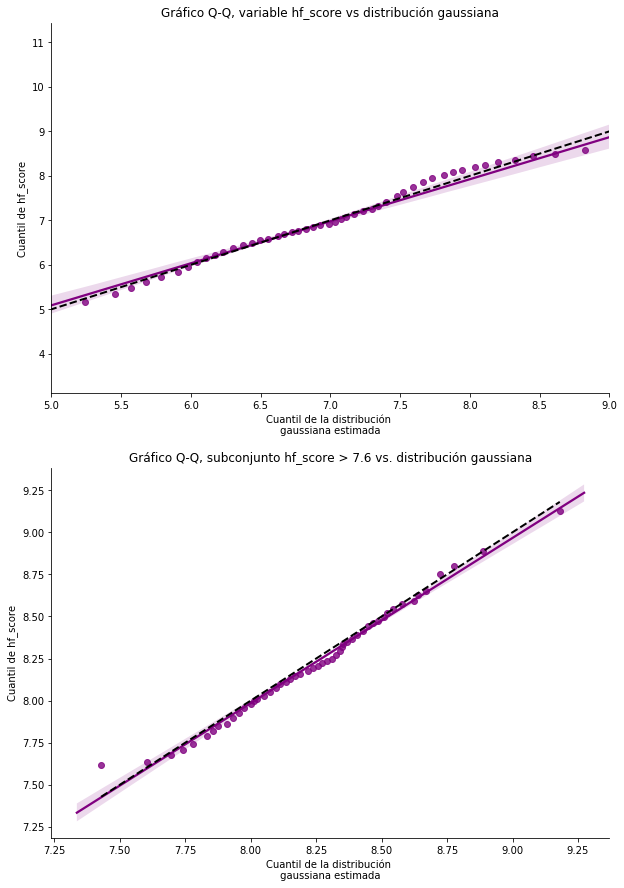

In [134]:
fig = plt.figure(figsize=(10,15))


ax=fig.add_subplot(211)
# Muestras del mismo tamaño, se calculan cuantiles
percentiles         = np.linspace(0,100,51)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_cuantiles        = np.percentile(variable, percentiles)
qn_cuantiles_normal = np.percentile(norm_dist.rvs(len(variable)), percentiles)

sb.regplot(x=qn_cuantiles_normal, y=qn_cuantiles)
plt.ylabel('Cuantil de hf_score')
plt.xlabel('Cuantil de la distribución \n gaussiana estimada ')
plt.title('Gráfico Q-Q, variable hf_score vs distribución gaussiana')
plt.xlim(5,9)

x = np.linspace(np.min((qn_cuantiles.min(), qn_cuantiles_normal.min())), np.max((qn_cuantiles.max(),qn_cuantiles_normal.max())))
plt.plot(x,x, color='black', ls="--",lw=2)


ax = fig.add_subplot(212)
percentiles2         = np.linspace(0,100,51)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_cuantiles2        = np.percentile(variable2, percentiles2)
qn_cuantiles_normal2 = np.percentile(norm_dist2.rvs(len(variable2)), percentiles2)

sb.regplot(x=qn_cuantiles_normal2, y=qn_cuantiles2)
plt.ylabel('Cuantil de hf_score')
plt.xlabel('Cuantil de la distribución \n gaussiana estimada ')
plt.title('Gráfico Q-Q, subconjunto hf_score > 7.6 vs. distribución gaussiana')

x2 = np.linspace(np.min((qn_cuantiles2.min(), qn_cuantiles_normal2.min())),
                np.max((qn_cuantiles2.max(),qn_cuantiles_normal2.max())))
plt.plot(x2,x2, color='black', ls="--",lw=2)

sb.despine()


<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

### 3.3 Q-Q Resultado en el mundo

1. __mundo__: el gráfico QQ demuestra que el simple hecho de considerar todos los valores de *hf-score*, hace que la distribución de los mismos no siga un comportamiento normal. Solo la mitad de sus datos yacen sobre la recta de igualdad y a partir de 7.4 los puntos se alejan considerablemente de la misma, tomando valores superiores que podrían deberse a un skewness a izquierda. Por otro lado, el comportamiento polinómico del conjunto de valores que más se aproximan ala recta varía su concavidad según el siguiente orden: abajo, arriba, abajo, lo que demuestra que la distribución es platicúrtica, es decir, más achatada, pues primero el ala izquierda de la muestra yace por encima de la normal, luego por debajo y finalmente por encima al alcanzar el ala derecha.
2. __subgrupo del mundo__: se observa que al considerar el subgrupo, aumenta el número de puntos coincidentes.  Además puede verse un comportamiento simétrico entre los puntos que no caen en la recta, lo cual se destaca frente al comportamiento asimétrico del caso anterior. En este caso no resulta evidente si tiene skewness y curtosis.

</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">
    
### 3.4 *hf_score*: skewness y kurtosis mundo

</div>

In [135]:
print(  'skewness hf_score:\t\t '   ,stats.skew(variable),
      '\nkurtosis hf_score:\t\t '   ,stats.kurtosis(variable),
      '\n===================================================================================',
      '\nskewness hf_score subconjunto:\t ',stats.skew(variable2),
      '\nkurtosis hf_score subconjunto:\t ',stats.kurtosis(variable2))

skewness hf_score:		  -0.21205190437691196 
kurtosis hf_score:		  -0.5101904315124792 
skewness hf_score subconjunto:	  0.2001602237986749 
kurtosis hf_score subconjunto:	  -0.4414007301617242


<div style="color:#585155; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">
    
- *hf_score* __mundo__: el valor de *skewness* negativa nos dice que la distribución tiene un sesgo hacia la derecha de la media. El valor de *kurtosis* pequeño implica una distribución más achatada que una normal, existen valores alejados del valor de tendencia cetral.


- *hf_score* __subgrupo__: el valor de *skewness* positivo nos dice que la distribución tiene un sesgo hacia la izquierda de la media. El valor de *kurtosis* pequeño implica una distribución achatada, existen valores alejados del valor de tendencia cetral.


</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

    
###  3.3 .: *hf_score*:  LA&C
 
A continuación se expone la distribución de la variable *hf_score* para LA&C considerando todos los valores que toma (figura superior), y un subgrupo de esta, para valores *hf_score*>7.6 (figura inferior). En ambos casos, se grafica una distribución teórica con los mismos parámetros de media y desviación estándar que muestran los datos.

</div>

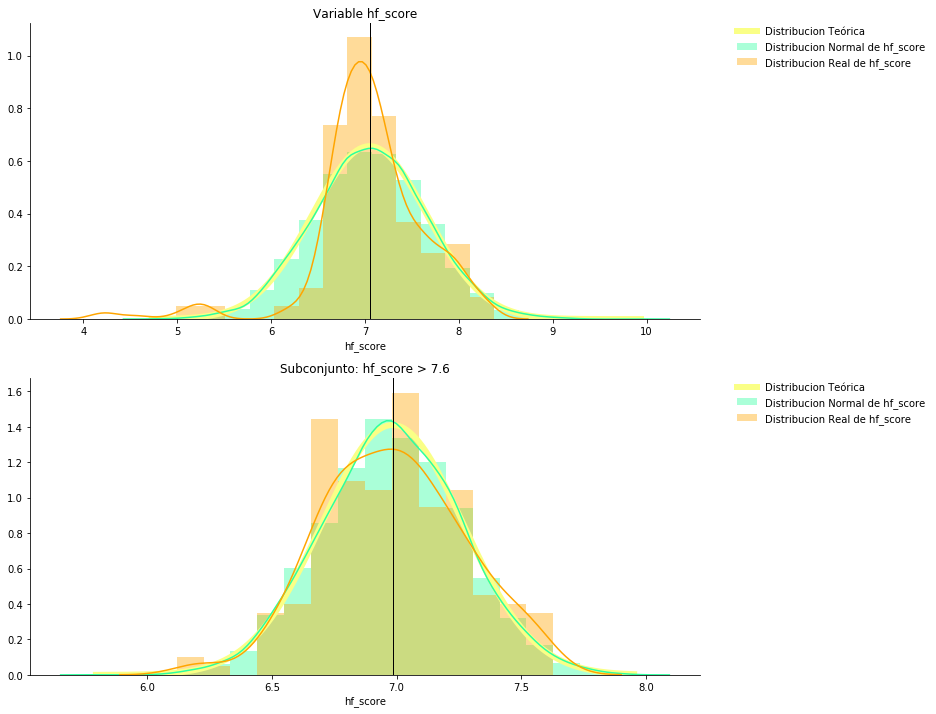

In [136]:
# se fabrica una distribucion gaussiana utilizando los estadisticos de media y sigma de hf_score
variable  = latinos_sin_nulos.hf_score
mu, sigma = stats.norm.fit(variable)
norm_dist = stats.norm(mu, sigma)
muestra   = norm_dist.rvs(10000)

# se fabrica una distribucion gaussiana utilizando los estadisticos de media y sigma de hf_score
variable2   = latinos_sin_nulos[(latinos_sin_nulos.hf_score>6)&(latinos_sin_nulos.hf_score<7.6)].hf_score
mu2, sigma2 = stats.norm.fit(variable2)
norm_dist2  = stats.norm(mu2, sigma2)
muestra2    = norm_dist2.rvs(10000)

fig = plt.figure(figsize=(12,12))
nbin=20

# grafico1
ax=fig.add_subplot(211)
x_plot = np.linspace(np.min(muestra), np.max(muestra), 1000)                                                                                                                  
plt.plot(x_plot, stats.norm.pdf(x_plot, mu, sigma),color='#faff86',lw=6,label='Distribucion Teórica')
sb.distplot(muestra , bins=nbin, label='Distribucion Normal de hf_score',color='#2cff9f')
sb.distplot(variable, bins=nbin, label='Distribucion Real de hf_score',color='orange',
            hist_kws={'range': (muestra.min(), muestra.max())})
plt.axvline(x=mu,ls='-' ,color='black',lw=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
plt.title('Variable hf_score')
sb.despine()

# grafico2
ax=fig.add_subplot(212)
x_plot = np.linspace(np.min(muestra2), np.max(muestra2), 1000)                                                                                                                  
plt.plot(x_plot, stats.norm.pdf(x_plot, mu2, sigma2),color='#faff86',lw=6,label='Distribucion Teórica')
sb.distplot(muestra2 , bins=nbin, label='Distribucion Normal de hf_score',color='#2cff9f')
sb.distplot(variable2, bins=nbin, label='Distribucion Real de hf_score',color='orange',
            hist_kws={'range': (muestra2.min(), muestra2.max())})
plt.axvline(x=mu2,ls='-' ,color='black',lw=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
plt.title('Subconjunto: hf_score > 7.6')
sb.despine()

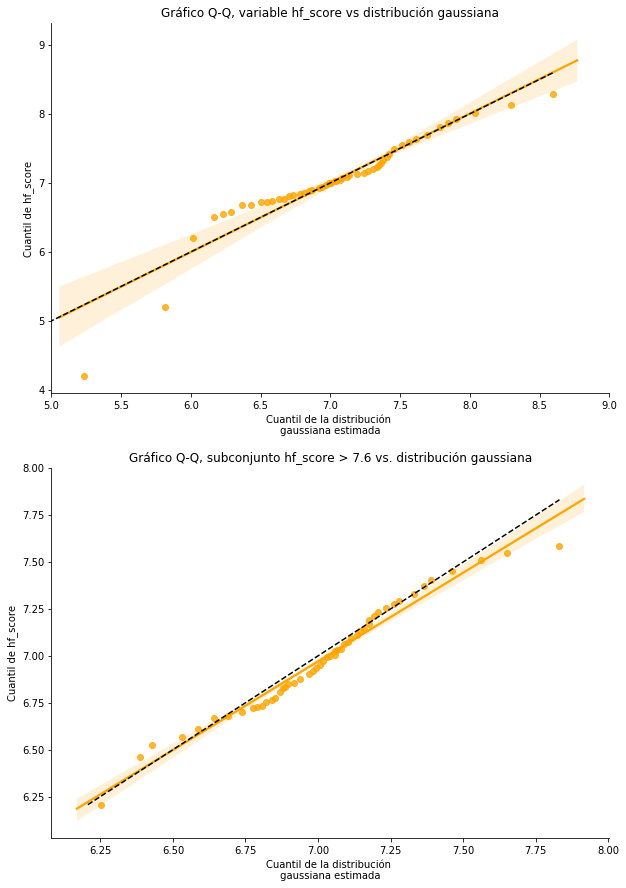

In [137]:
fig = plt.figure(figsize=(10,15))



ax=fig.add_subplot(211)
# Muestras del mismo tamaño, se calculan cuantiles
percentiles         = np.linspace(0,100,51)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_cuantiles        = np.percentile(variable, percentiles)
qn_cuantiles_normal = np.percentile(norm_dist.rvs(len(variable)), percentiles)

sb.regplot(x=qn_cuantiles_normal, y=qn_cuantiles, color='orange')
plt.ylabel('Cuantil de hf_score')
plt.xlabel('Cuantil de la distribución \n gaussiana estimada ')
plt.title('Gráfico Q-Q, variable hf_score vs distribución gaussiana')
plt.xlim(5,9)

x = np.linspace(np.min((qn_cuantiles.min(), qn_cuantiles_normal.min())), np.max((qn_cuantiles.max(),qn_cuantiles_normal.max())))
plt.plot(x,x, color='black', ls="--")


ax = fig.add_subplot(212)
percentiles2         = np.linspace(0,100,51)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_cuantiles2        = np.percentile(variable2, percentiles2)
qn_cuantiles_normal2 = np.percentile(norm_dist2.rvs(len(variable2)), percentiles2)

sb.regplot(x=qn_cuantiles_normal2, y=qn_cuantiles2, color='orange')
plt.ylabel('Cuantil de hf_score')
plt.xlabel('Cuantil de la distribución \n gaussiana estimada ')
plt.title('Gráfico Q-Q, subconjunto hf_score > 7.6 vs. distribución gaussiana')

x2 = np.linspace(np.min((qn_cuantiles2.min(), qn_cuantiles_normal2.min())),
                np.max((qn_cuantiles2.max(),qn_cuantiles_normal2.max())))
plt.plot(x2,x2, color='black', ls="--")

sb.despine()

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

### 3.3 Q-Q Resultado en LA&C:

1. __LA&C__: el gráfico QQ demuestra que el simple hecho de considerar todos los valores de *hf-score*, hace que la distribución de los mismos no siga un comportamiento normal. Los pares siguen una curva polinómica entorno a la recta identidad y solo algunos pocos puntos yacen sobre dicha recta. Este comportamiento es típico de una distribución binomial.
2. __subgrupo de LA&C__: se observa que al considerar el subgrupo el número de puntos que muestra igualdad, aumenta y además puede verse una simetría de aquellos puntos que no caen en dicha recta, lo cual no se destaca frente al comportamiento asimétrico del caso anterior. A simple viste pareciera ser platicúrtica por el orden de las concavidades delcomportamiento polinómico

</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">
    
### 3.4 *hf_score*: skewness y kurtosis LA&C

</div>

In [138]:
print('skewness hf_score:\t\t'   ,stats.skew(variable),
      '\nkurtosis hf_score:\t\t ',stats.kurtosis(variable),
      '\n===================================================================================',     
      '\nskewness hf_score subconjunto:\t ',stats.skew(variable2),
      '\nkurtosis hf_score subconjunto:\t ',stats.kurtosis(variable2))

skewness hf_score:		 -1.442092151332142 
kurtosis hf_score:		  5.340188962725749 
skewness hf_score subconjunto:	  -0.015609779293289593 
kurtosis hf_score subconjunto:	  -0.19801034448230714


<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">
    
- *hf_score* __LA&C__: el valor de *skewness* negativa nos dice que la distribución tiene un sesgo hacia la derecha de la media. El valor de *kurtosis* relativamente alto implica una mayor concentración de valores de la variable tanto muy cerca de la media de la distribución (pico) como en las colas de la distribución. 


- *hf_score* __subgrupo de LA&C__: el valor de *skewness* negativa nos dice que la distribución tiene un sesgo hacia la derecha de la media. El valor de *kurtosis* pequeño implica una distribución achatada, existen valores alejados del valor de tendencia cetral.


</div>

In [139]:
variablelm = latinos_sin_nulos.pf_identity
variabletm = mundo_sin_nulos.pf_identity


print(  'skewness pf_identity latinos:\t ' ,stats.skew(variablelm),
      '\nkurtosis pf_identity latinos:\t ',stats.kurtosis(variablelm),
      '\nskewness pf_identity mundo:\t ',stats.skew(variable2),
      '\nkurtosis pf_identity mundo:\t ',stats.kurtosis(variable2))

skewness pf_identity latinos:	  -1.0478440216224703 
kurtosis pf_identity latinos:	  -0.2953048553672586 
skewness pf_identity mundo:	  -0.015609779293289593 
kurtosis pf_identity mundo:	  -0.19801034448230714


<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

### 3.4 *pf_identity*: skewness y kurtosis

Se calculan los valores de *skewness* y *kurtosis* para las distribuciones de *pf_identity* en el mundo y en LA&C.

Tanto en LA&C como en el mundo, el valor de *skewness* negativa nos dice que la distribución tiene un sesgo hacia la derecha de la media. El valor de *kurtosis* pequeño implica una distribución achatada, existen valores alejados del valor de tendencia cetral.]
</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

Un comportamiento polinómico de tercer grado evidencia la presencia de curtosis distinta de cero, y dependiendo de cómo se presentan las concavidades, será platicúrtica o leptocúrtica. Por otro lados cuando un conjunto de puntos se aleja de la recta, dependiendo de cómo se alejan se tendrá una determinada asimetría.

</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:30px;text-align: justify">


## 4. Correlaciones

</div>


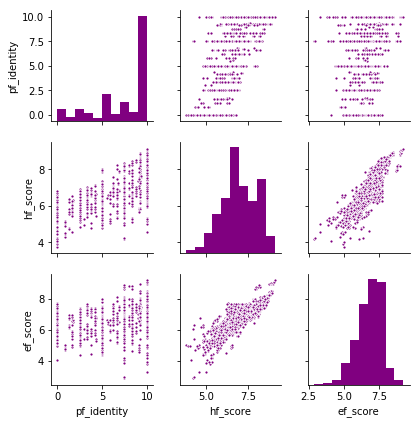

In [140]:
datos = mundo_sin_nulos[['pf_identity', 'hf_score', 'ef_score']]
sb.pairplot(data=datos,markers='.',height=2)
sb.despine()

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

## 4.1 Gráfico pairplot

- El gráfico pairplot evidencia una correlación entre las variables *hf_score* y *ef_score*.
- Pairplot, no es adecuado para la visualización de variables categóricas. En este caso, como se trata de una variable categórica ordinal es posible visualizar los datos, no obstante, lo ideal es realizar diagramas de cajas donde se toma a la variable categórica en un eje y en el otro a la variable que se desea cruzar con la misma. No obstante a grandes rasgos uno podría pensar que hay una relación lineal creciente entre *hf_score* con *pf_identity*, como ya se ha observado en análisis anteiores, pero, no con *ef_score* ya que los valores que esta última toma se ven reflejados respecto a la recta horizontal *ef_score*=6.
</div>

In [141]:
base_para_boxplot.pf_identity = round(base_para_boxplot.pf_identity,2)

In [142]:
#palette = sb.color_palette('magma_r',50)
#g = sb.catplot(data=base_para_boxplot, x='pf_identity', y='hf_score', 
#               col='clase',kind='box',aspect=1.8,notch=True,palette=palette)
#g.set_xticklabels(rotation=90)

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">
    
A continuación se utilizarán las categorías de *pf_identity* con el fin de evitar box nulos
</div>

<div style="color:#585155; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

## 4.2 Relación *hf_score* vs *pf_identity*

Se puede observar que a nivel global, existe una correlación entre la variable *hf_score* y *pf_identity*. No ocurre lo mismo en LA&C, donde se observa un comportamiento prácticamente constante del *hf_score* conforme crece *pf_identity*, excluyendo la categoría 9 donde se produce un crecimiento atípico del *hf_score*.

</div>

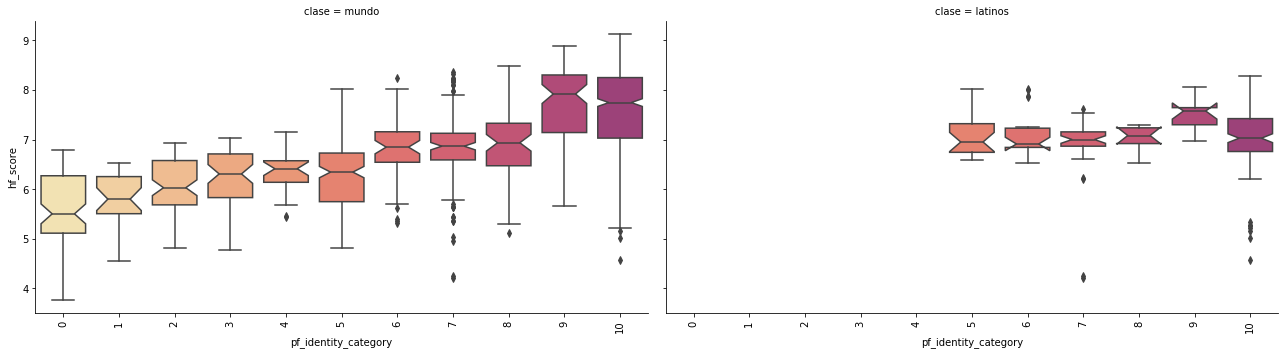

In [143]:
palette = sb.color_palette('magma_r',20)
g = sb.catplot(data=base_para_boxplot, x='pf_identity_category', 
               y='hf_score', col='clase',kind='box',aspect=1.8,notch=True,palette=palette)
g.set_xticklabels(rotation=90)

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

## 4.2 Relación *he_score* vs *pf_identity*
    
A nivel global, en general, parece existir una tendencia de crecimiento para valores de *ef_score* conforme aumenta *pf_identity*, aunque esto es solo visible de a tramos y la correlación es menos notoria que en el caso anterior.

En LA&C el comportamiento para valores de *pf_identity*>=5 es similar al observado a nivel global.

</div>

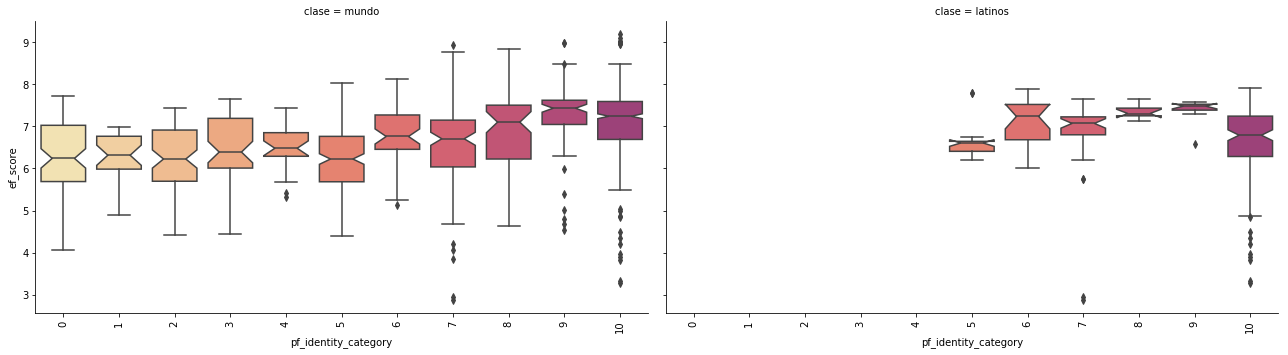

In [144]:
g = sb.catplot(data=base_para_boxplot, x='pf_identity_category', y='ef_score', 
               col='clase',kind='box',aspect=1.8,notch=True,palette=palette)
g.set_xticklabels(rotation=90)

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

## 4.2 4.3 continuación

Otra manera de visualizar lo anterior es mediante los gráficos que siguen. Los comportamientos descriptos anteriormente ahora se ajustan mediante una función lineal, sin embargo la gran dispersión nos alerta sobre la bondad del ajuste realizado.

</div>

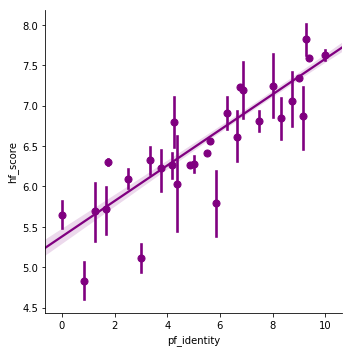

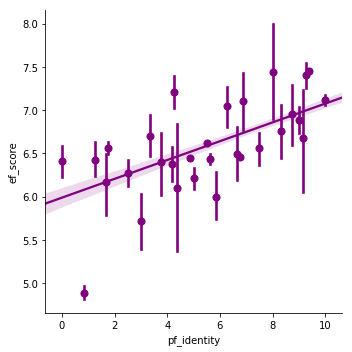

In [145]:
datos2 = mundo_sin_nulos[['pf_identity', 'hf_score', 'ef_score']]

#con estimador
ax = sb.lmplot(x="pf_identity", y="hf_score", data=datos2, x_estimator=np.mean)
sb.lmplot(x="pf_identity", y="ef_score", data=datos2, x_estimator=np.mean)

In [146]:
mundo_sin_nulos['hf_score_category'] = mundo_sin_nulos.hf_score.astype(int)
mundo_sin_nulos['ef_score_category'] = mundo_sin_nulos.ef_score.astype(int)

/home/meugenia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/meugenia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

## 4.4 Coeficientes de Correlación 

</div>

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">


- Como se ha demostrado anteriormente, tanto *pf_score* como *hf_score* no se corresponden con distribuciones normales, por lo tanto no podemos aplicar el coeficiente de Perason, pues es condición necesaria que la muestra provenga de una distribución normal.

- Por otro lado, tampoco es aplicable, en forma directa, el coeficiente de Kendall, ya que se aplica sobre variables categóricas de la misma dimensión, de tal manera que la tabla de doble entrada sea una matriz cuadrada. En este caso se tiene a *pf_identity* como variable categórica ordinal, pero las otras dos variables son continuas. Si se categorizan las tres variables por redondeo al mínimo entero, se obtienen once categorías para *pf_score*, siete para *hf_score* y ocho para *ef_escore*, de esta manera no es posible aplicar el coeficiente, salvo se utilicen las categorías comunes o se completen las de menor número de categorías con el fin de alcanzar la misma dimensión que *pf_identity*

- El coeficiente de Spearman, es el único que se puede aplicar de forma directa sin tener que agregar o quitar datos, este es aplicable tanto a variables continuas como discretas. Además, dado que es no paramétrico, no se tiene la necesidad de conocer la distribución de la que proviene la muestra, como es el caso que nos ocupa. Por lo tanto se calculará este coeficiente para ver el grado de correlación entre *pf_identity* con las variables continuas.
</div>

In [147]:
mundo_sin_nulos.ef_score_category.unique(),mundo_sin_nulos.hf_score_category.unique(),mundo_sin_nulos.pf_identity_category.unique()

(array([7, 4, 5, 6, 8, 2, 9, 3]),
 array([7, 5, 6, 8, 4, 3, 9]),
 array([ 6,  0,  7, 10,  8,  9,  3,  1,  5,  4,  2]))

In [148]:
#Son coeficientes no paramétricos
# Además nuestra variable es del tipo ordinal (una escala de valores).
#En estos casos podemos utilizar el coeficiente de Spearman. 

mundo_sin_nulos[['pf_identity_category', 'hf_score_category','ef_score_category']].corr(method ='spearman')

,pf_identity_category,hf_score_category,ef_score_category
pf_identity_category,1.000000,0.665174,0.400732
hf_score_category,0.665174,1.000000,0.776010
ef_score_category,0.400732,0.776010,1.000000


In [149]:
mundo_sin_nulos[['pf_identity', 'hf_score','ef_score']].corr(method ='spearman')

,pf_identity,hf_score,ef_score
pf_identity,1.000000,0.686109,0.426993
hf_score,0.686109,1.000000,0.860647
ef_score,0.426993,0.860647,1.000000


<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

El coeficiente de correlación de Spearman muestra que existen correlaciones positivas entre las variables, la más fuerte sería entre la libertad humana con la económica, como se observó en el gráfico de pairplot. En segundo lugar, entre la libertad humana con la personal, que también pudo observarse en el gráfico de diagramas de cajas que vincula estas variable. Finalmente habría una correlación más débil entre la libertad económica con la humana, no obstante, sin un criterio de rechazo, estos valores no nos dicen nada. A continuación se busca el p-valor asociado a cada coeficiente de correlación. 
</div>

In [150]:
from scipy.stats import spearmanr
display(spearmanr(mundo_sin_nulos.pf_identity, mundo_sin_nulos.hf_score))
display(spearmanr(mundo_sin_nulos.pf_identity, mundo_sin_nulos.ef_score))
display(spearmanr(mundo_sin_nulos.ef_score, mundo_sin_nulos.hf_score))

SpearmanrResult(correlation=0.6861094212039192, pvalue=2.3804640834918467e-192)

SpearmanrResult(correlation=0.4269934752976421, pvalue=3.6044427282609636e-62)

SpearmanrResult(correlation=0.8606467585473371, pvalue=0.0)

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

En todos los casos el p-valor es menor a una significancia de un 1%, por lo tanto no se puede confiar que al ante una nueva muetsra se obtenga la misma correlación. Qué sucede si se ordenan los datos? Nada
</div>

In [151]:
from scipy.stats import spearmanr
display(spearmanr(mundo_sin_nulos.pf_identity.sort_values(ascending=True), mundo_sin_nulos.hf_score.sort_values(ascending=True)))
display(spearmanr(mundo_sin_nulos.pf_identity.sort_values(ascending=True), mundo_sin_nulos.ef_score.sort_values(ascending=True)))
display(spearmanr(mundo_sin_nulos.ef_score.sort_values(ascending=True), mundo_sin_nulos.hf_score.sort_values(ascending=True)))

SpearmanrResult(correlation=0.9560100247921645, pvalue=0.0)

SpearmanrResult(correlation=0.9560032362835802, pvalue=0.0)

SpearmanrResult(correlation=0.9999894257801527, pvalue=0.0)

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">
    
### OTRAS FORMAS DE VISUALIZAR LA CORRELACIÓN ENTRE LAS VARIABLES    
</div>    

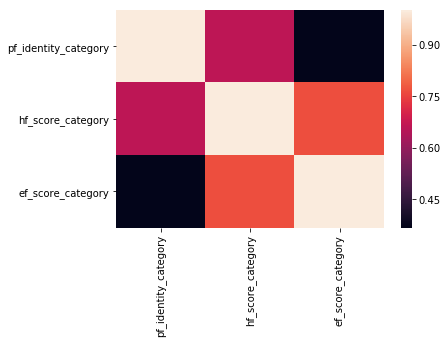

In [152]:
data_heat = mundo_sin_nulos[['pf_identity_category','hf_score_category','ef_score_category']] 

corr = data_heat.corr()
sb.heatmap(corr)

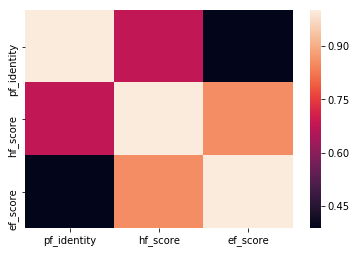

In [153]:
data_heat = mundo_sin_nulos[['pf_identity','hf_score','ef_score']] 

corr = data_heat.corr()
sb.heatmap(corr)

<div style="color:#393939; background-color:rgba(174,118,144,0.2); padding:10px; border-radius: 7px; font-size:15px;text-align: justify">

# CONCLUSIÓN GLOBAL

## Libertad de idetidad y relaciones en latinoamérica:

Al observar el gráfico de los valores medios de libertad personal a través de los años separando el mundo en diferentes regiones, se manifiesta la existencia de dos grupos. Uno de ellos con índices de *pf_identity* en el rango 8-10 (al que llamaremos Grupo1); y muy por debajo otro grupo que toma valores por debajo de 6 puntos (Grupo2).

Si observamos el Grupo1 en detalle, podemos separarlo a su vez en dos: *Eastern Europe*, *Western Europe*, *North America* y *East Asia* presentan valores de libertad personal con media aproximadamente 10 desde el año 2008 hasta el 2014. En el año 2014 ocurre algún acontecimiento que a nivel mundial afecta la valoración sobre este tipo de libertad. Vemos que los países del primer mundo son los que tienen los valores más altos en cuanto a la  apreciación de la libertad personal, y esto viene de la mano de una buena calidad de vida en general.
Dentro del mismo Grupo1, un poco por debajo tenemos las regiones de: *Latinoamérica y el Caribe*, *Caucasus y Central Asia y Oceanía*. Estas tres regiones tienen una amplia variación de la media de la libertad personal con los años, donde en algunos periodos el índice sube, en otros baja, y vuelve a subir. Sin embargo, en las tres regiones es notoria la tendencia mundial en 2014. En general, estos paises en vías de desarrollo se adjudican buenos niveles de libertad, siendo los ejemplos intermedios entre los países desarrollados y aquellos en los que la calidad de vida se encuentra por debajo de lo aceptable. 

En el Grupo2 se halla *South Asia*, *Sub-Saharan Africa y Middle East* y *North Africa*. Estas tres regiones abarcan los países más vulnerados del mundo, donde la existencia de estructuras sociales es débil, la alimentación es insuficiente y sus habitantes tienen un pobre acceso a la sanidad y educación. En estos países además se vulneran los derechos de protección a la infancia más que en cualquier otra región del mundo. 

Separando latinoamérica en la cantidad de países dentro de ella que fueron muestreados, podemos distinguir un conjunto de ellos en el que la libertad personal decae desde 2008 al presente (al que llamamos No especiales), y otro conjunto donde pasa lo contrario (Especiales). En el primer conjunto encontramos varios países de América del Sur: Argentina, Uruguay, Brasil, Bolivia, Chile, Paraguay, Colombia y Venezuela, entre otros. Si bien en algunos países el comportamiento del índice de libertad personal se mantiene constante a lo largo de los años, existe una tendencia general a decaer después del año 2010. Esto puede estar asociado a los grandes conflictos políticos que tuvieron lugar en nuestra región en los últimos años; podemos mencionar la crisis económica y política en Brasil, los conflictos armados en Colombia, y la crisis extrema en Venezuela. Esto último es evidente en la caída abrupta que sufre el índice de libertad económica en este país. 

En el segundo conjunto distinguimos, sobre todo, islas del caribe, donde podríamos inferir que la calidad de vida en los últimos años ha mejorado, por lo menos en este aspecto. Estas mejoras en varios casos vienen acompañadas de un aumento de la libertad económica y de una visibilización en América Latina del movimiento feminista y la promoción de las ideologías de género. 


## Libertad de identidad y de relaciones frente al *ef_score* y *hf_score*

 Haciendo uso del coeficiente de Spearman, se encuentra que las correlaciones existentes entre *pf_identity* vs *ef_score* (coef_spearman=0.4), son diferentes a las existentes entre *pf_identity* vs *hf_score* (coef_spearman=0.66). A su vez existe una buena correlación entre *ef_score* y *hf_score* (coef_spearman=0.77), esto es esperable debido a que el cálulo de *hf_score* se hace a partir de los valores de *ef_score* y *pf_identity*, pero visto de esta manera se pone de manifiesto que ambas variables poseen un peso diferente en el cálculo. 
 
 </div>